# Preparation Methods

In [1]:
import sys
sys.path.append("..")
import pandas as pd
from data_loader.SportsDB_data_loader import get_all_textual_semantic_types, get_all_numerical_semantic_types, get_LabelEncoder
import json

def get_inverse_transformed_labeled_class_report(class_report):
    label_enc = get_LabelEncoder()

    new_class_report = {}

    for entry in class_report:
        try:
            label = label_enc.inverse_transform([int(entry)])[0]
            new_class_report[label] = class_report[entry]
        except:
            new_class_report[entry] = class_report[entry]
            
    return new_class_report

def get_numerical_class_report(class_report):
    class_report_data = []
    for key in list(class_report):
        if key in get_all_numerical_semantic_types():
            class_report_data.append([key, class_report[key]["precision"], class_report[key]["recall"],class_report[key]["f1-score"], class_report[key]["support"]])

    class_report_df = pd.DataFrame(class_report_data, columns=["semantic_type", "precision", "recall", "f1-score", "support"])

    class_report_df["support_weighted_sum"] = class_report_df["f1-score"] * class_report_df["support"]
    #print(f"Macro Avg. F1: {class_report_df['f1-score'].sum()/len(class_report_df)}")
    #print(f"Support Weighted Avg. F1: {class_report_df['support_weighted_sum'].sum()/class_report_df['support'].sum()})")
    return [class_report_df['f1-score'].sum()/len(class_report_df),class_report_df['support_weighted_sum'].sum()/class_report_df['support'].sum()]

def get_textual_class_report(class_report):
    class_report_data = []
    for key in list(class_report):
        if key in get_all_textual_semantic_types():
            class_report_data.append([key, class_report[key]["precision"], class_report[key]["recall"],class_report[key]["f1-score"], class_report[key]["support"]])

    class_report_df = pd.DataFrame(class_report_data, columns=["semantic_type", "precision", "recall", "f1-score", "support"])

    class_report_df["support_weighted_sum"] = class_report_df["f1-score"] * class_report_df["support"]
    #print(f"Macro Avg. F1: {class_report_df['f1-score'].sum()/len(class_report_df)}")
    #print(f"Support Weighted Avg. F1: {class_report_df['support_weighted_sum'].sum()/class_report_df['support'].sum()})")
    return [class_report_df['f1-score'].sum()/len(class_report_df),class_report_df['support_weighted_sum'].sum()/class_report_df['support'].sum()]

def get_complete_textual_class_report(class_report):
    new_class_report = {}
    for key in list(class_report):
        if key in get_all_textual_semantic_types():
            new_class_report[key] = class_report[key]
    return new_class_report

def get_complete_numerical_class_report(class_report):
    new_class_report = {}
    for key in list(class_report):
        if key in get_all_numerical_semantic_types():
            new_class_report[key] = class_report[key]
    return new_class_report

/ext/daten-wi/slangenecker/column_annotation_gnn/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
len(get_LabelEncoder().classes_)

452

# Columnwise vs. Tablewise shuffeld columns

/tmp/ipykernel_2448468/3569733658.py:146: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+sport_domains+["overall"])


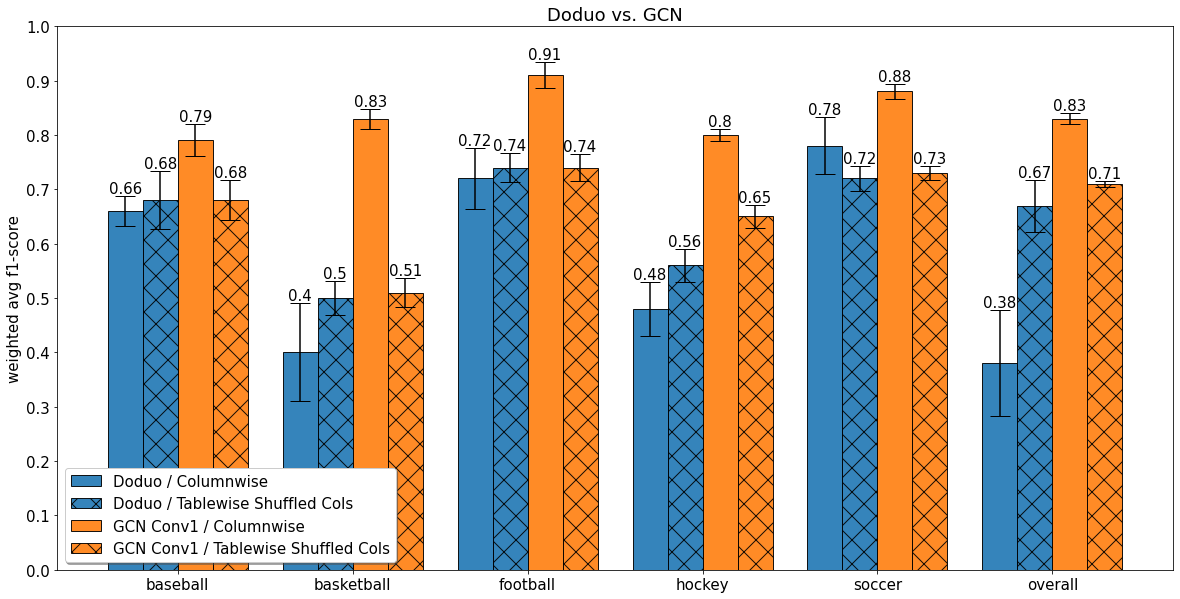

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import json
plt.rc("font", size=15)

sport_domains = ["baseball","basketball","football","hockey","soccer"]
learning_rate = 1e-05

data = []

for sport_domain in sport_domains:
    for random_state in range(1,6):
        # ## collect GNN results
        # try:
        #     with open(f"../output/CA_GCN/classification_report/single_bert-base-uncased_ts0.2_ml510_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
        #         class_report = json.load(f)
        #         data.append(["GCN", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        # except:
        #     try:
        #         print(f"GCN: No classification report for {sport_domain} with random state {random_state} with max length 510")
        #         with open(f"../output/CA_GCN/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
        #             class_report = json.load(f)
        #             data.append(["GCN",sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        #     except:    
        #         print(f"GCM:No classification report for {sport_domain} with random state {random_state}")
                
        ## collect GCN Conv1 results
        try:
            with open(f"../output/CA_GCN_Conv1/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
                class_report = json.load(f)
                data.append(["GCN_Conv1", "columnwise", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        except:
            print(f"GCN_Conv1/columnswise: No classification report for {sport_domain} with random state {random_state}")
            
        ## collect GCN Conv1
        try:
            with open(f"../output/CA_GCN_Conv1/classification_report/table_bert-base-uncased_ts0.2_ml10_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scTrue_best_micro_f1.pt.json") as f:
                class_report = json.load(f)
                data.append(["GCN_Conv1", "tablewise_shuffled", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        except:
            print(f"GCN_Conv1/tablewise shuffled: No classification report for {sport_domain} with random state {random_state}")
            
        # ## collect GAT results
        # try:
        #     with open(f"../output/CA_GAT/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
        #         class_report = json.load(f)
        #         data.append(["GAT", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        # except:
        #     print(f"GAT: No classification report for {sport_domain} with random state {random_state}")
        
        ## collect Doduo results
        try:
            with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_single_bert_bert-base-uncased-bs16-ml-510__SportsTables-1.00_scFalse_rs{random_state}_['{sport_domain}']=SportsTables.json_f1_micro_class_report.json") as f:
                class_report = json.load(f)
                data.append(["Doduo", "columnwise", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        except:
            print(f"Doduo/columnswise: No classification report for {sport_domain} with random state {random_state}")
            
        ## collect Doduo results
        try:
            with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_mosato_bert_bert-base-uncased-bs1-ml-10__SportsTables-1.00_scTrue_rs{random_state}_['{sport_domain}']=SportsTables.json_f1_micro_class_report.json") as f:
                class_report = json.load(f)
                data.append(["Doduo", "tablewise_shuffled",sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        except:
            print(f"Doduo/tablewise shuffled: No classification report for {sport_domain} with random state {random_state}")

# ## collect GCN results
# for random_state in range(1,6):
#     try:
#         with open(f"../output/CA_GCN/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
#             class_report = json.load(f)
#             data.append(["GCN","overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
#     except:
#         print(f"GCN: No classification report for overall with random state {random_state}")
        
## collect GCN_Conv1 results
for random_state in range(1,6):
    try:
        with open(f"../output/CA_GCN_Conv1/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
            class_report = json.load(f)
            data.append(["GCN_Conv1", "columnwise", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    except:
        print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
        
## collect GCN_Conv1 results
for random_state in range(1,6):
    try:
        with open(f"../output/CA_GCN_Conv1/classification_report/table_bert-base-uncased_ts0.2_ml10_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scTrue_best_micro_f1.pt.json") as f:
            class_report = json.load(f)
            data.append(["GCN_Conv1", "tablewise_shuffled","overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    except:
        print(f"GCN_Conv1/tablewise shuffled: No classification report for overall with random state {random_state}")
        

        
# ## collect GAT results
# for random_state in range(1,6):
#     try:
#         with open(f"../output/CA_GAT/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
#             class_report = json.load(f)
#             data.append(["GAT","overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
#     except:
#         print(f"GAT: No classification report for overall with random state {random_state}")
        
## collect Doduo results
for random_state in range(1,6):
    try:
        with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_single_bert_bert-base-uncased-bs16-ml-254__SportsTables-1.00_scFalse_rs{random_state}_['baseball', 'basketball', 'football', 'hockey', 'soccer']=SportsTables.json_f1_micro_class_report.json") as f:
            class_report = json.load(f)
            data.append(["Doduo","columnwise","overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    except:
        print(f"Doduo/columnswise: No classification report for overall with random state {random_state}")
        
## collect Doduo results
for random_state in range(1,6):
    try:
        with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_mosato_bert_bert-base-uncased-bs1-ml-10__SportsTables-1.00_scTrue_rs{random_state}_['baseball', 'basketball', 'football', 'hockey', 'soccer']=SportsTables.json_f1_micro_class_report.json") as f:
            class_report = json.load(f)
            data.append(["Doduo", "tablewise_shuffled","overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    except:
        print(f"Doduo/tablewise shuffled: No classification report for overall with random state {random_state}")

df = pd.DataFrame(data, columns=["model", "serialization","sport","random_state","accuracy", "macro avg f1-score", "weighted avg f1-score"])


width = 0.2
fig, ax = plt.subplots(figsize=(20,10))

metric = "weighted avg f1-score"

bars = []
for sport_domain_idx, sport_domain in enumerate(sport_domains+["overall"]):
    bars.append(ax.bar([sport_domain_idx-(3*width/2)], round(df[(df["model"] == "Doduo") & (df["serialization"] == "columnwise") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "Doduo") & (df["serialization"] == "columnwise") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C0", label="Doduo / Columnwise", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx-width/2], round(df[(df["model"] == "Doduo") & (df["serialization"] == "tablewise_shuffled")& (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "Doduo") & (df["serialization"] == "tablewise_shuffled") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C0", label="Doduo / Tablewise Shuffled Cols", alpha=0.9, edgecolor="black", hatch="x"))
    
    bars.append(ax.bar([sport_domain_idx+width/2], round(df[(df["model"] == "GCN_Conv1") & (df["serialization"] == "columnwise")& (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GCN_Conv1") & (df["serialization"] == "columnwise") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="GCN Conv1 / Columnwise", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx+(3*width/2)], round(df[(df["model"] == "GCN_Conv1") & (df["serialization"] == "tablewise_shuffled")& (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GCN_Conv1") & (df["serialization"] == "tablewise_shuffled") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="GCN Conv1 / Tablewise Shuffled Cols", alpha=0.9, edgecolor="black", hatch="x"))
  
for bar in bars:
    try:
        ax.bar_label(bar)
    except:
        pass  

plt.title("Doduo vs. GCN")
ax.set_xticklabels([""]+sport_domains+["overall"])
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.legend(handles=bars[:4], fancybox=True, shadow=True, loc="lower left")
ax.set_ylabel(metric)
#plt.grid()
plt.show()

### Only on Numerics

/tmp/ipykernel_2448468/4224110423.py:154: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+sport_domains+["overall"])


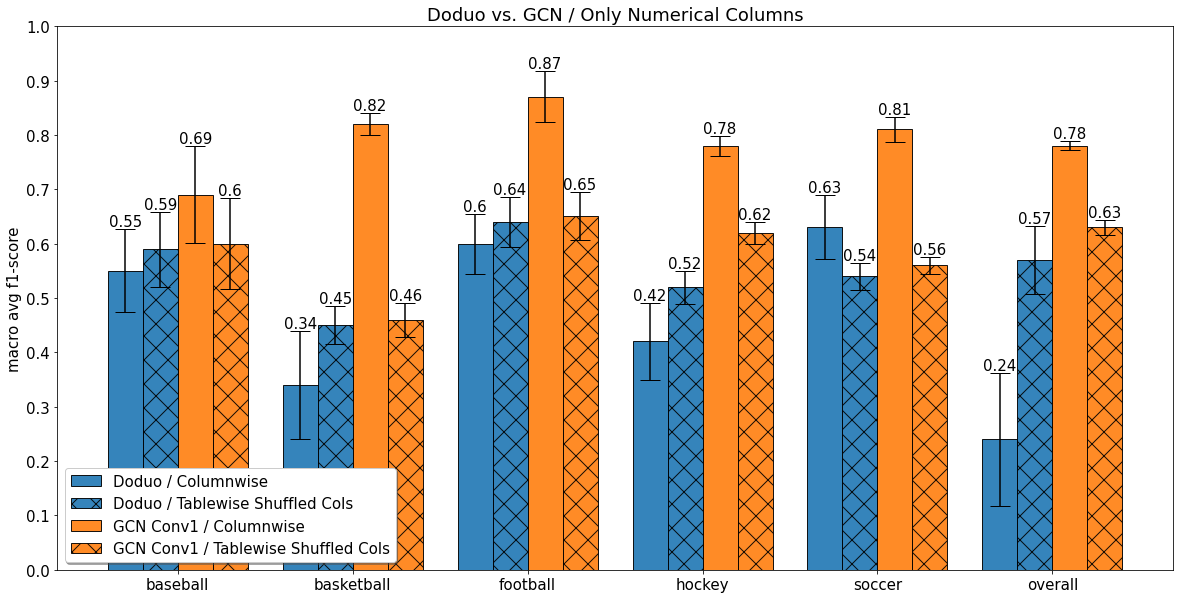

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import json
plt.rc("font", size=15)

sport_domains = ["baseball","basketball","football","hockey","soccer"]
learning_rate = 1e-05

data = []

for sport_domain in sport_domains:
    for random_state in range(1,6):
        # ## collect GNN results
        # try:
        #     with open(f"../output/CA_GCN/classification_report/single_bert-base-uncased_ts0.2_ml510_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
        #         class_report = json.load(f)
        #         data.append(["GCN", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        # except:
        #     try:
        #         print(f"GCN: No classification report for {sport_domain} with random state {random_state} with max length 510")
        #         with open(f"../output/CA_GCN/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
        #             class_report = json.load(f)
        #             data.append(["GCN",sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        #     except:    
        #         print(f"GCM:No classification report for {sport_domain} with random state {random_state}")
                
        ## collect GCN Conv1 results
        try:
            with open(f"../output/CA_GCN_Conv1/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
                class_report = json.load(f)
                macro_f1, s_w_f1 = get_numerical_class_report(class_report)
                data.append(["GCN_Conv1", "columnwise", sport_domain, random_state, macro_f1, s_w_f1])
        except:
            print(f"GCN_Conv1/columnswise: No classification report for {sport_domain} with random state {random_state}")
            
        ## collect GCN Conv1
        try:
            with open(f"../output/CA_GCN_Conv1/classification_report/table_bert-base-uncased_ts0.2_ml10_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scTrue_best_micro_f1.pt.json") as f:
                class_report = json.load(f)
                macro_f1, s_w_f1 = get_numerical_class_report(class_report)
                data.append(["GCN_Conv1", "tablewise_shuffled", sport_domain, random_state, macro_f1, s_w_f1])
        except:
            print(f"GCN_Conv1/tablewise shuffled: No classification report for {sport_domain} with random state {random_state}")
            
        # ## collect GAT results
        # try:
        #     with open(f"../output/CA_GAT/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
        #         class_report = json.load(f)
        #         data.append(["GAT", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        # except:
        #     print(f"GAT: No classification report for {sport_domain} with random state {random_state}")
        
        ## collect Doduo results
        try:
            with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_single_bert_bert-base-uncased-bs16-ml-510__SportsTables-1.00_scFalse_rs{random_state}_['{sport_domain}']=SportsTables.json_f1_micro_class_report.json") as f:
                class_report = json.load(f)
                macro_f1, s_w_f1 = get_numerical_class_report(class_report)
                data.append(["Doduo", "columnwise", sport_domain, random_state, macro_f1, s_w_f1])
        except:
            print(f"Doduo/columnswise: No classification report for {sport_domain} with random state {random_state}")
            
        ## collect Doduo results
        try:
            with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_mosato_bert_bert-base-uncased-bs1-ml-10__SportsTables-1.00_scTrue_rs{random_state}_['{sport_domain}']=SportsTables.json_f1_micro_class_report.json") as f:
                class_report = json.load(f)
                macro_f1, s_w_f1 = get_numerical_class_report(class_report)
                data.append(["Doduo", "tablewise_shuffled",sport_domain, random_state, macro_f1, s_w_f1])
        except:
            print(f"Doduo/tablewise shuffled: No classification report for {sport_domain} with random state {random_state}")

# ## collect GCN results
# for random_state in range(1,6):
#     try:
#         with open(f"../output/CA_GCN/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
#             class_report = json.load(f)
#             data.append(["GCN","overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
#     except:
#         print(f"GCN: No classification report for overall with random state {random_state}")
        
## collect GCN_Conv1 results
for random_state in range(1,6):
    try:
        with open(f"../output/CA_GCN_Conv1/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_numerical_class_report(class_report)
            data.append(["GCN_Conv1", "columnwise", "overall", random_state, macro_f1, s_w_f1])
    except:
        print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
        
## collect GCN_Conv1 results
for random_state in range(1,6):
    try:
        with open(f"../output/CA_GCN_Conv1/classification_report/table_bert-base-uncased_ts0.2_ml10_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scTrue_best_micro_f1.pt.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_numerical_class_report(class_report)
            data.append(["GCN_Conv1", "tablewise_shuffled","overall", random_state, macro_f1, s_w_f1])
    except:
        print(f"GCN_Conv1/tablewise shuffled: No classification report for overall with random state {random_state}")
        

        
# ## collect GAT results
# for random_state in range(1,6):
#     try:
#         with open(f"../output/CA_GAT/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
#             class_report = json.load(f)
#             data.append(["GAT","overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
#     except:
#         print(f"GAT: No classification report for overall with random state {random_state}")
        
## collect Doduo results
for random_state in range(1,6):
    try:
        with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_single_bert_bert-base-uncased-bs16-ml-254__SportsTables-1.00_scFalse_rs{random_state}_['baseball', 'basketball', 'football', 'hockey', 'soccer']=SportsTables.json_f1_micro_class_report.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_numerical_class_report(class_report)
            data.append(["Doduo","columnwise","overall", random_state, macro_f1, s_w_f1])
    except:
        print(f"Doduo/columnswise: No classification report for overall with random state {random_state}")
        
## collect Doduo results
for random_state in range(1,6):
    try:
        with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_mosato_bert_bert-base-uncased-bs1-ml-10__SportsTables-1.00_scTrue_rs{random_state}_['baseball', 'basketball', 'football', 'hockey', 'soccer']=SportsTables.json_f1_micro_class_report.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_numerical_class_report(class_report)
            data.append(["Doduo", "tablewise_shuffled","overall", random_state, macro_f1, s_w_f1])
    except:
        print(f"Doduo/tablewise shuffled: No classification report for overall with random state {random_state}")

df = pd.DataFrame(data, columns=["model", "serialization","sport","random_state", "macro avg f1-score", "weighted avg f1-score"])


width = 0.2
fig, ax = plt.subplots(figsize=(20,10))

metric = "macro avg f1-score"

bars = []
for sport_domain_idx, sport_domain in enumerate(sport_domains+["overall"]):
    bars.append(ax.bar([sport_domain_idx-(3*width/2)], round(df[(df["model"] == "Doduo") & (df["serialization"] == "columnwise") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "Doduo") & (df["serialization"] == "columnwise") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C0", label="Doduo / Columnwise", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx-width/2], round(df[(df["model"] == "Doduo") & (df["serialization"] == "tablewise_shuffled")& (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "Doduo") & (df["serialization"] == "tablewise_shuffled") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C0", label="Doduo / Tablewise Shuffled Cols", alpha=0.9, edgecolor="black", hatch="x"))
    
    bars.append(ax.bar([sport_domain_idx+width/2], round(df[(df["model"] == "GCN_Conv1") & (df["serialization"] == "columnwise")& (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GCN_Conv1") & (df["serialization"] == "columnwise") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="GCN Conv1 / Columnwise", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx+(3*width/2)], round(df[(df["model"] == "GCN_Conv1") & (df["serialization"] == "tablewise_shuffled")& (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GCN_Conv1") & (df["serialization"] == "tablewise_shuffled") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="GCN Conv1 / Tablewise Shuffled Cols", alpha=0.9, edgecolor="black", hatch="x"))
  
for bar in bars:
    try:
        ax.bar_label(bar)
    except:
        pass  

plt.title("Doduo vs. GCN / Only Numerical Columns")
ax.set_xticklabels([""]+sport_domains+["overall"])
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.legend(handles=bars[:4], fancybox=True, shadow=True, loc="lower left")
ax.set_ylabel(metric)
#plt.grid()
plt.show()

# Sherlock vs. Sato vs. GCN

/tmp/ipykernel_4063823/1582927420.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+sport_domains+["overall"])


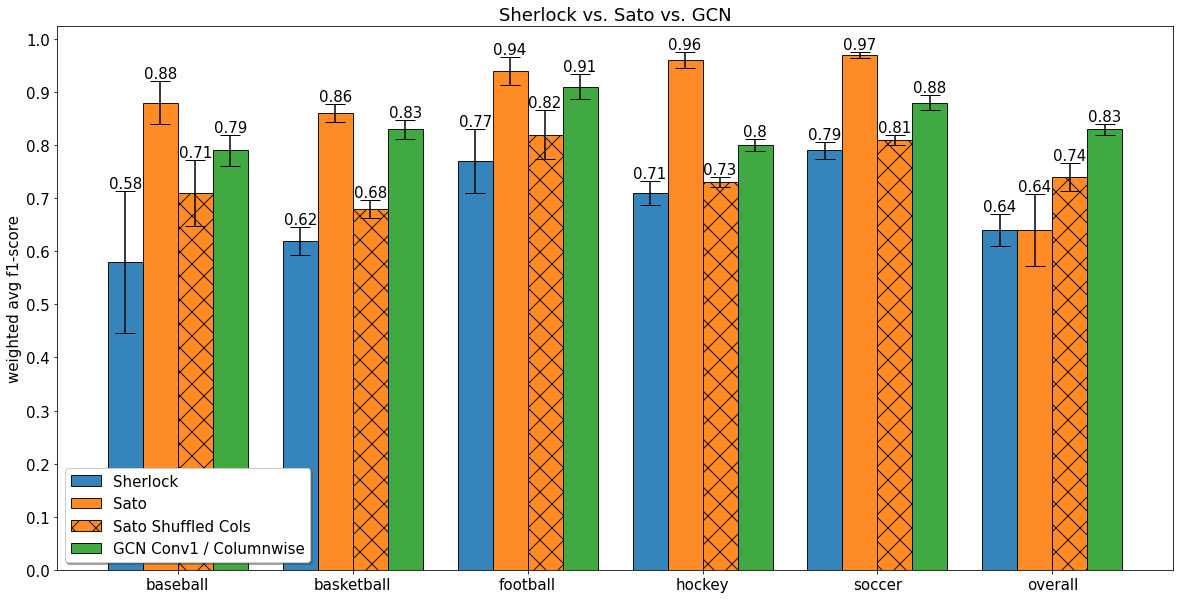

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rc("font", size=15)

sport_domains = ["baseball","basketball","football","hockey","soccer"]
learning_rate = 1e-05

data = []

for sport_domain in sport_domains:
    for random_state in range(1,6):
        ## collect sherlock results
        with open(f"/home/slangenecker/sato/results/sherlock_log/type_SportsTables/sherlock_eval_{sport_domain}_{random_state}/outputs/classification_report.json") as f:
            class_report = json.load(f)
            data.append(["sherlock", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
             
        ## collect sato results
        with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_{sport_domain}_{random_state}/outputs/classification_report_CRF+LDA_retrain_{sport_domain}_{random_state}.pt.json") as f:
            class_report = json.load(f)
            data.append(["sato", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])

        ## collect sato shuffled cols results
        with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_{sport_domain}_{random_state}_True/outputs/classification_report_CRF+LDA_retrain_{sport_domain}_{random_state}_True.pt.json") as f:
            class_report = json.load(f)
            data.append(["sato (shuffled cols)", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        
        ## collect GCN Conv1 results
        try:
            with open(f"../output/CA_GCN_Conv1/columns/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
                class_report = json.load(f)
                data.append(["GCN_Conv1", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
        except:
            print(f"GCN_Conv1/columnswise: No classification report for {sport_domain} with random state {random_state}")
  
for random_state in range(1,6):
    ### collect sherlock overall results
    with open(f"/home/slangenecker/sato/results/sherlock_log/type_SportsTables/sherlock_eval_overall_{random_state}/outputs/classification_report.json") as f:
        class_report = json.load(f)
        data.append(["sherlock", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    
    ### collect sato overall results
    with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}.pt.json") as f:
        class_report = json.load(f)
        data.append(["sato", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])

    ### collect sato shuffled cols overall results
    with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}_True/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}_True.pt.json") as f:
        class_report = json.load(f)
        data.append(["sato (shuffled cols)", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])

    ### collect gcn overall results
    try:
        with open(f"../output/CA_GCN_Conv1/columns/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
            class_report = json.load(f)
            data.append(["GCN_Conv1", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    except:
        print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
  
      
df = pd.DataFrame(data, columns=["model","sport","random_state", "accuracy", "macro avg f1-score", "weighted avg f1-score"])

width = 0.2
fig, ax = plt.subplots(figsize=(20,10))

metric = "weighted avg f1-score"

bars = []
for sport_domain_idx, sport_domain in enumerate(sport_domains+["overall"]):
    bars.append(ax.bar([sport_domain_idx-(3*width/2)], round(df[(df["model"] == "sherlock") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "sherlock") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C0", label="Sherlock", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx-width/2], round(df[(df["model"] == "sato") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "sato") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="Sato", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx+width/2], round(df[(df["model"] == "sato (shuffled cols)") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "sato (shuffled cols)") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="Sato Shuffled Cols", alpha=0.9, edgecolor="black", hatch="x"))    
    bars.append(ax.bar([sport_domain_idx+(3*width/2)], round(df[(df["model"] == "GCN_Conv1") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GCN_Conv1") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C2", label="GCN Conv1 / Columnwise", alpha=0.9, edgecolor="black"))

for bar in bars:
    try:
        ax.bar_label(bar)
    except:
        pass  

plt.title("Sherlock vs. Sato vs. GCN")
ax.set_xticklabels([""]+sport_domains+["overall"])
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.legend(handles=bars[:4], fancybox=True, shadow=True, loc="lower left")
ax.set_ylabel(metric)
#plt.grid()
plt.show()

## Only on Numerics

/tmp/ipykernel_4063823/1014595959.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+sport_domains+["overall"])


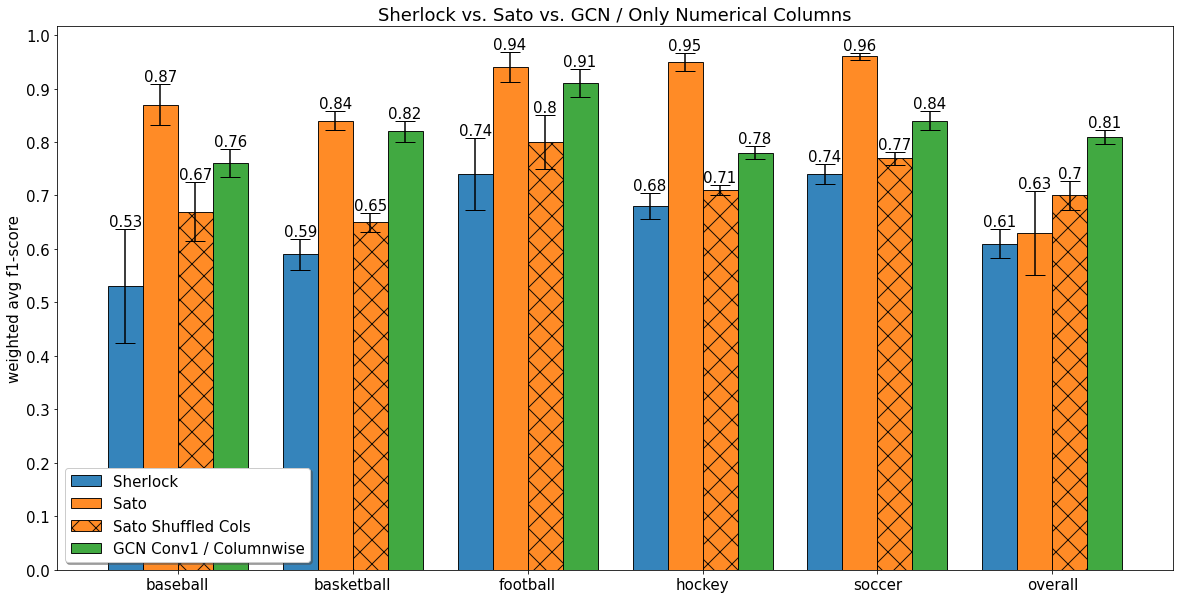

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rc("font", size=15)

sport_domains = ["baseball","basketball","football","hockey","soccer"]
learning_rate = 1e-05

data = []

for sport_domain in sport_domains:
    for random_state in range(1,6):
        ## collect sherlock results
        with open(f"/home/slangenecker/sato/results/sherlock_log/type_SportsTables/sherlock_eval_{sport_domain}_{random_state}/outputs/classification_report.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
            data.append(["sherlock", sport_domain, random_state, macro_f1, s_w_f1])
             
        ## collect sato results
        with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_{sport_domain}_{random_state}/outputs/classification_report_CRF+LDA_retrain_{sport_domain}_{random_state}.pt.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
            data.append(["sato", sport_domain, random_state, macro_f1, s_w_f1])
            
        ## collect sato shuffled cols results
        with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_{sport_domain}_{random_state}_True/outputs/classification_report_CRF+LDA_retrain_{sport_domain}_{random_state}_True.pt.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
            data.append(["sato (shuffled cols)", sport_domain, random_state, macro_f1, s_w_f1])

        ## collect GCN Conv1 results
        try:
            with open(f"../output/CA_GCN_Conv1/columns/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
                class_report = json.load(f)
                macro_f1, s_w_f1 = get_numerical_class_report(class_report)
                data.append(["GCN_Conv1", sport_domain, random_state, macro_f1, s_w_f1])
        except:
            print(f"GCN_Conv1/columnswise: No classification report for {sport_domain} with random state {random_state}")
  
for random_state in range(1,6):
    ### collect sherlock overall results
    with open(f"/home/slangenecker/sato/results/sherlock_log/type_SportsTables/sherlock_eval_overall_{random_state}/outputs/classification_report.json") as f:
        class_report = json.load(f)
        macro_f1, s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
        data.append(["sherlock", "overall", random_state, macro_f1, s_w_f1])
    
    ### collect sato overall results
    with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}.pt.json") as f:
        class_report = json.load(f)
        macro_f1, s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
        data.append(["sato", "overall", random_state, macro_f1, s_w_f1])
        
    ### collect sato shuffled cols overall results
    with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}_True/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}_True.pt.json") as f:
        class_report = json.load(f)
        macro_f1, s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
        data.append(["sato (shuffled cols)", "overall", random_state, macro_f1, s_w_f1])

    ### collect gcn overall results
    try:
        with open(f"../output/CA_GCN_Conv1/columns/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_numerical_class_report(class_report)
            data.append(["GCN_Conv1", "overall", random_state, macro_f1, s_w_f1])
    except:
        print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
  
      
df = pd.DataFrame(data, columns=["model","sport","random_state", "macro avg f1-score", "weighted avg f1-score"])

width = 0.2
fig, ax = plt.subplots(figsize=(20,10))

metric = "weighted avg f1-score"

bars = []
for sport_domain_idx, sport_domain in enumerate(sport_domains+["overall"]):
    bars.append(ax.bar([sport_domain_idx-(3*width/2)], round(df[(df["model"] == "sherlock") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "sherlock") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C0", label="Sherlock", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx-width/2], round(df[(df["model"] == "sato") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "sato") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="Sato", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx+width/2], round(df[(df["model"] == "sato (shuffled cols)") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "sato (shuffled cols)") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="Sato Shuffled Cols", alpha=0.9, edgecolor="black", hatch="x"))    
    bars.append(ax.bar([sport_domain_idx+(3*width/2)], round(df[(df["model"] == "GCN_Conv1") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GCN_Conv1") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C2", label="GCN Conv1 / Columnwise", alpha=0.9, edgecolor="black"))

for bar in bars:
    try:
        ax.bar_label(bar)
    except:
        pass  

plt.title("Sherlock vs. Sato vs. GCN / Only Numerical Columns")
ax.set_xticklabels([""]+sport_domains+["overall"])
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.legend(handles=bars[:4], fancybox=True, shadow=True, loc="lower left")
ax.set_ylabel(metric)
#plt.grid()
plt.show()

## Only on Textual

/tmp/ipykernel_4063823/1340142386.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""]+sport_domains+["overall"])


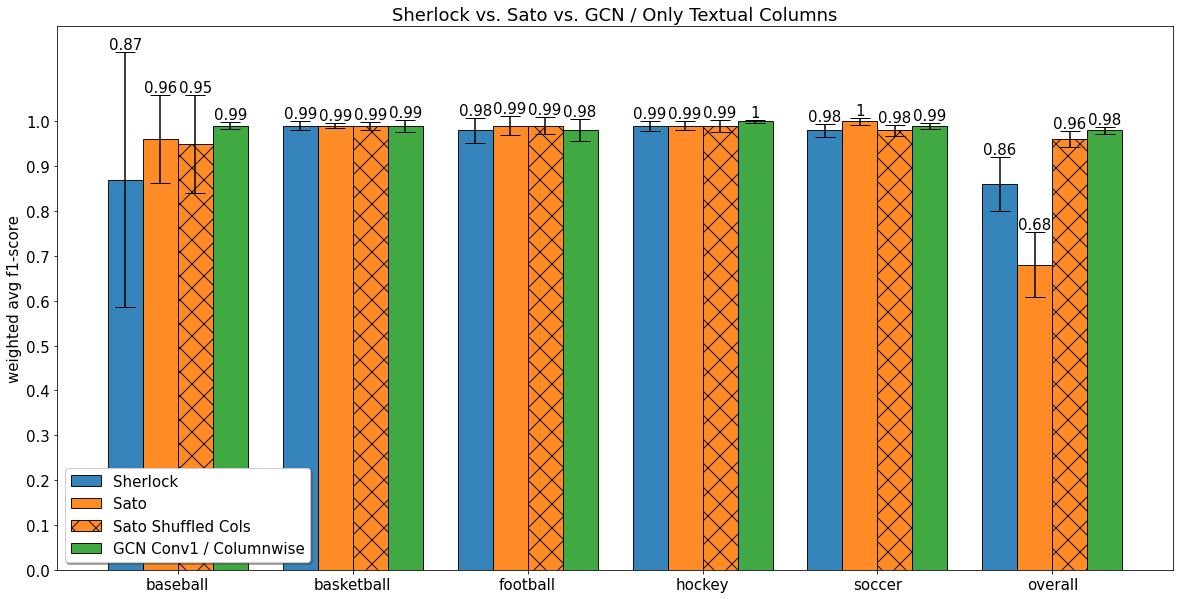

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rc("font", size=15)

sport_domains = ["baseball","basketball","football","hockey","soccer"]
learning_rate = 1e-05

data = []


for sport_domain in sport_domains:
    for random_state in range(1,6):
        ## collect sherlock results
        with open(f"/home/slangenecker/sato/results/sherlock_log/type_SportsTables/sherlock_eval_{sport_domain}_{random_state}/outputs/classification_report.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
            data.append(["sherlock", sport_domain, random_state, macro_f1, s_w_f1])
             
        ## collect sato results
        with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_{sport_domain}_{random_state}/outputs/classification_report_CRF+LDA_retrain_{sport_domain}_{random_state}.pt.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
            data.append(["sato", sport_domain, random_state, macro_f1, s_w_f1])
            
        ## collect sato shuffled cols results
        with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_{sport_domain}_{random_state}_True/outputs/classification_report_CRF+LDA_retrain_{sport_domain}_{random_state}_True.pt.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
            data.append(["sato (shuffled cols)", sport_domain, random_state, macro_f1, s_w_f1])

        ## collect GCN Conv1 results
        try:
            with open(f"../output/CA_GCN_Conv1/columns/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
                class_report = json.load(f)
                macro_f1, s_w_f1 = get_textual_class_report(class_report)
                data.append(["GCN_Conv1", sport_domain, random_state, macro_f1, s_w_f1])
        except:
            print(f"GCN_Conv1/columnswise: No classification report for {sport_domain} with random state {random_state}")
  
for random_state in range(1,6):
    ### collect sherlock overall results
    with open(f"/home/slangenecker/sato/results/sherlock_log/type_SportsTables/sherlock_eval_overall_{random_state}/outputs/classification_report.json") as f:
        class_report = json.load(f)
        macro_f1, s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
        data.append(["sherlock", "overall", random_state, macro_f1, s_w_f1])
    
    ### collect sato overall results
    with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}.pt.json") as f:
        class_report = json.load(f)
        macro_f1, s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
        data.append(["sato", "overall", random_state, macro_f1, s_w_f1])
        
    ### collect sato shuffled cols overall results
    with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}_True/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}_True.pt.json") as f:
        class_report = json.load(f)
        macro_f1, s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
        data.append(["sato (shuffled cols)", "overall", random_state, macro_f1, s_w_f1])

    ### collect gcn overall results
    try:
        with open(f"../output/CA_GCN_Conv1/columns/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
            class_report = json.load(f)
            macro_f1, s_w_f1 = get_textual_class_report(class_report)
            data.append(["GCN_Conv1", "overall", random_state, macro_f1, s_w_f1])
    except:
        print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
  
      
df = pd.DataFrame(data, columns=["model","sport","random_state", "macro avg f1-score", "weighted avg f1-score"])

width = 0.2
fig, ax = plt.subplots(figsize=(20,10))

metric = "weighted avg f1-score"

bars = []
for sport_domain_idx, sport_domain in enumerate(sport_domains+["overall"]):
    bars.append(ax.bar([sport_domain_idx-(3*width/2)], round(df[(df["model"] == "sherlock") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "sherlock") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C0", label="Sherlock", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx-width/2], round(df[(df["model"] == "sato") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "sato") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="Sato", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx+width/2], round(df[(df["model"] == "sato (shuffled cols)") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "sato (shuffled cols)") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="Sato Shuffled Cols", alpha=0.9, edgecolor="black", hatch="x"))    
    bars.append(ax.bar([sport_domain_idx+(3*width/2)], round(df[(df["model"] == "GCN_Conv1") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GCN_Conv1") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C2", label="GCN Conv1 / Columnwise", alpha=0.9, edgecolor="black"))

for bar in bars:
    try:
        ax.bar_label(bar)
    except:
        pass  

plt.title("Sherlock vs. Sato vs. GCN / Only Textual Columns")
ax.set_xticklabels([""]+sport_domains+["overall"])
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.legend(handles=bars[:4], fancybox=True, shadow=True, loc="lower left")
ax.set_ylabel(metric)
#plt.grid()
plt.show()

# GPT (fine-tuned) vs GCN

GCN_Conv1/columnswise: No classification report for overall with random state 1
GCN_Conv1/columnswise: No classification report for overall with random state 2
GCN_Conv1/columnswise: No classification report for overall with random state 3
GPT / Tablewise: No classification report for overall with random state 3
GPT / Tablewise Shuffled Cols: No classification report for overall with random state 3
GCN_Conv1/columnswise: No classification report for overall with random state 4
GPT / Tablewise: No classification report for overall with random state 4
GPT / Tablewise Shuffled Cols: No classification report for overall with random state 4
GCN_Conv1/columnswise: No classification report for overall with random state 5
GPT / Tablewise: No classification report for overall with random state 5
GPT / Tablewise Shuffled Cols: No classification report for overall with random state 5


/tmp/ipykernel_377404/4265155101.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""])


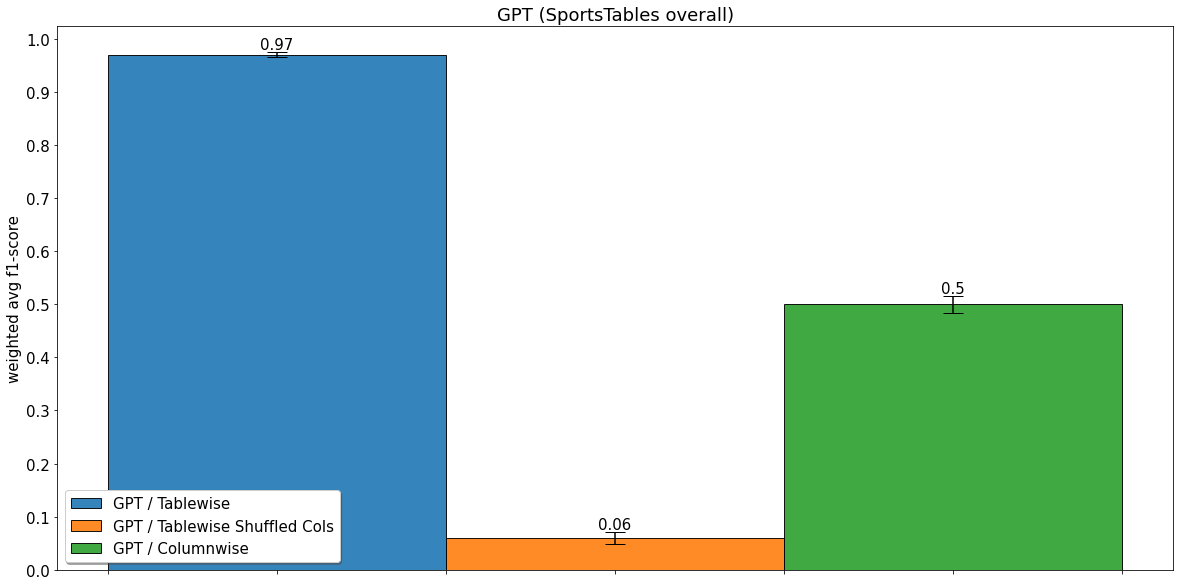

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rc("font", size=15)

sport_domains = ["baseball","basketball","football","hockey","soccer"]
learning_rate = 1e-05

data = []

# for sport_domain in sport_domains:
#     for random_state in range(1,6):
#         ## collect sherlock results
#         with open(f"/home/slangenecker/sato/results/sherlock_log/type_SportsTables/sherlock_eval_{sport_domain}_{random_state}/outputs/classification_report.json") as f:
#             class_report = json.load(f)
#             data.append(["sherlock", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
             
#         ## collect sato results
#         with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_{sport_domain}_{random_state}/outputs/classification_report_CRF+LDA_retrain_{sport_domain}_{random_state}.pt.json") as f:
#             class_report = json.load(f)
#             data.append(["sato", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])

#         ## collect GCN Conv1 results
#         try:
#             with open(f"../output/CA_GCN_Conv1/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['{sport_domain}']_scFalse_best_micro_f1.pt.json") as f:
#                 class_report = json.load(f)
#                 data.append(["GCN_Conv1", sport_domain, random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
#         except:
#             print(f"GCN_Conv1/columnswise: No classification report for {sport_domain} with random state {random_state}")
  
for random_state in range(1,6):
    ### collect gcn overall results
    try:
        with open(f"../output/CA_GCN_Conv1/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr{learning_rate}_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
            class_report = json.load(f)
            data.append(["GCN_Conv1", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    except:
        print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
        
    ### collect gpt (ada/fine-tuned) model
    try:
        with open(f"../gpt/results/classification_report_overall_False_{random_state}.json") as f:
            class_report = json.load(f)
            data.append(["GPT / Tablewise", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    except:
        print(f"GPT / Tablewise: No classification report for overall with random state {random_state}")
        
    ### collect gpt (ada/fine-tuned) model
    try:
        with open(f"../gpt/results/classification_report_overall_True_{random_state}.json") as f:
            class_report = json.load(f)
            data.append(["GPT / Tablewise Shuffled Cols", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    except:
        print(f"GPT / Tablewise Shuffled Cols: No classification report for overall with random state {random_state}")
    
    ### collect gpt (ada/fine-tuned) model
    try:
        with open(f"../gpt/results/classification_report_overall_True_{random_state}_columnwise.json") as f:
            class_report = json.load(f)
            data.append(["GPT / Columnwise", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"]])
    except:
        print(f"GPT / Columnwise: No classification report for overall with random state {random_state}")
      
df = pd.DataFrame(data, columns=["model","sport","random_state", "accuracy", "macro avg f1-score", "weighted avg f1-score"])

width = 0.2
fig, ax = plt.subplots(figsize=(20,10))

metric = "weighted avg f1-score"

bars = []
for sport_domain_idx, sport_domain in enumerate(["overall"]):
    bars.append(ax.bar([sport_domain_idx-(3*width/2)], round(df[(df["model"] == "GPT / Tablewise") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GPT / Tablewise") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C0", label="GPT / Tablewise", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([sport_domain_idx-width/2], round(df[(df["model"] == "GPT / Tablewise Shuffled Cols") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GPT / Tablewise Shuffled Cols") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C1", label="GPT / Tablewise Shuffled Cols", alpha=0.9, edgecolor="black"))    
    bars.append(ax.bar([sport_domain_idx+width/2], round(df[(df["model"] == "GPT / Columnwise") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GPT / Columnwise") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C2", label="GPT / Columnwise", alpha=0.9, edgecolor="black"))    
    bars.append(ax.bar([sport_domain_idx+(3*width/2)], round(df[(df["model"] == "GCN_Conv1") & (df["sport"] == sport_domain)][metric].mean(),2), yerr=df[(df["model"] == "GCN_Conv1") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C3", label="GCN Conv1 / Columnwise", alpha=0.9, edgecolor="black"))

for bar in bars:
    try:
        ax.bar_label(bar)
    except:
        pass  

plt.title("GPT (SportsTables overall)")
#ax.set_xticklabels([""]+sport_domains+["overall"])
ax.set_xticklabels([""])
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.legend(handles=bars[:3], fancybox=True, shadow=True, loc="lower left")
ax.set_ylabel(metric)
#plt.grid()
plt.show()

In [3]:
df

,model,sport,random_state,accuracy,macro avg f1-score,weighted avg f1-score
0,GPT / Tablewise,overall,1,0.971188,0.925690,0.970226
1,GPT / Tablewise Shuffled Cols,overall,1,0.075727,0.037547,0.071464
2,GPT / Columnwise,overall,1,0.514168,0.420379,0.508510
3,GPT / Tablewise,overall,2,0.976775,0.965364,0.976877
4,GPT / Tablewise Shuffled Cols,overall,2,0.055951,0.025582,0.056205
5,GPT / Columnwise,overall,2,0.481294,0.393172,0.473701
6,GPT / Columnwise,overall,3,0.507967,0.432024,0.502895
7,GPT / Columnwise,overall,4,0.516840,0.425485,0.510442
8,GPT / Columnwise,overall,5,0.517935,0.443927,0.510640


# All models together in one plot

In [12]:
## data preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rc("font", size=15)

data = []

for random_state in range(1,6):
    ### collect sherlock overall results
    with open(f"/home/slangenecker/sato/results/sherlock_log/type_SportsTables/sherlock_eval_overall_{random_state}/outputs/classification_report.json") as f:
        sherlock_class_report = json.load(f)
        text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(sherlock_class_report))
        num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(sherlock_class_report))
        data.append(["sherlock", "overall", random_state, sherlock_class_report["accuracy"], sherlock_class_report["macro avg"]["f1-score"], sherlock_class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    
    
    ### collect sato overall results
    with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}.pt.json") as f:
        sato_class_report = json.load(f)
        text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(sato_class_report))
        num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(sato_class_report))
        data.append(["sato", "overall", random_state, sato_class_report["accuracy"], sato_class_report["macro avg"]["f1-score"], sato_class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])

    
    ### collect sato shuffled cols overall results
    with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}_True/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}_True.pt.json") as f:
        sato_shuffled_class_report = json.load(f)
        text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(sato_shuffled_class_report))
        num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(sato_shuffled_class_report))
        data.append(["sato (shuffled cols)", "overall", random_state, sato_shuffled_class_report["accuracy"], sato_shuffled_class_report["macro avg"]["f1-score"], sato_shuffled_class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
        
    ### collect Doduo results
    try:
        with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_single_bert_bert-base-uncased-bs16-ml-254__SportsTables-1.00_scFalse_rs{random_state}_['baseball', 'basketball', 'football', 'hockey', 'soccer']=SportsTables.json_f1_micro_class_report.json") as f:
            dosolo_class_report = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(dosolo_class_report))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(dosolo_class_report))
            data.append(["doduo (columnwise)", "overall", random_state, dosolo_class_report["accuracy"], dosolo_class_report["macro avg"]["f1-score"], dosolo_class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"Doduo/columnswise: No classification report for overall with random state {random_state}")
        
    ### collect Doduo results
    try:
        with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_mosato_bert_bert-base-uncased-bs1-ml-10__SportsTables-1.00_scTrue_rs{random_state}_['baseball', 'basketball', 'football', 'hockey', 'soccer']=SportsTables.json_f1_micro_class_report.json") as f:
            doduo_class_report = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(doduo_class_report))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(doduo_class_report))
            data.append(["doduo (tablewise shuffled)", "overall", random_state, doduo_class_report["accuracy"], doduo_class_report["macro avg"]["f1-score"], doduo_class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"Doduo/columnswise: No classification report for overall with random state {random_state}")
        
    ### collect gpt (ada/fine-tuned) model
    try:
        with open(f"../gpt/results/classification_report_overall_False_{random_state}.json") as f:
            class_report = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
            data.append(["GPT (tablewise)", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"GPT / Tablewise: No classification report for overall with random state {random_state}")
        
    ### collect gpt (ada/fine-tuned) model tablewise shuffled cols
    try:
        with open(f"../gpt/results/classification_report_overall_True_{random_state}.json") as f:
            class_report = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
            data.append(["GPT (tablewise/shuffled)", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"GPT / Tablewise Shuffled Cols: No classification report for overall with random state {random_state}")
    
    ### collect gpt (ada/fine-tuned) model columnwise tokenization
    try:
        with open(f"../gpt/results/classification_report_overall_True_{random_state}_columnwise.json") as f:
            gpt_class_report = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(gpt_class_report))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(gpt_class_report))
            data.append(["GPT (columnwise)", "overall", random_state, gpt_class_report["accuracy"],gpt_class_report["macro avg"]["f1-score"], gpt_class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"GPT / Columnwise: No classification report for overall with random state {random_state}")
        
    
    ### collect gcn overall results
    try:
        with open(f"../output/SportsTables/CA_GCN_Conv1/columns/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr1e-05_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
            class_report = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
            data.append(["GCN_Conv1", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
        
    ### collect gcn overall results
    try:
        with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr1e-05_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
            pythagoras_class_report = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report))
            data.append(["GCN_Conv1_enriched", "overall", random_state, pythagoras_class_report["accuracy"],pythagoras_class_report["macro avg"]["f1-score"], pythagoras_class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
        
    # ### collect gcn overall results enriched_column_names 
    # try:
    #     with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched_column_names/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr1e-05_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
    #         pythagoras_class_report = json.load(f)
    #         text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report))
    #         num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report))
    #         data.append(["GCN_Conv1_enriched", "overall", random_state, pythagoras_class_report["accuracy"],pythagoras_class_report["macro avg"]["f1-score"], pythagoras_class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    # except:
    #     print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")

df = pd.DataFrame(data, columns=["model","sport","random_state", "accuracy", "macro avg f1-score", "weighted avg f1-score", "textual macro avg f1-score", "textual weighted avg f1-score", "numerical macro avg f1-score", "numerical weighted avg f1-score"])

GPT / Tablewise: No classification report for overall with random state 3
GPT / Tablewise Shuffled Cols: No classification report for overall with random state 3
GPT / Tablewise: No classification report for overall with random state 4
GPT / Tablewise Shuffled Cols: No classification report for overall with random state 4
GPT / Tablewise: No classification report for overall with random state 5
GPT / Tablewise Shuffled Cols: No classification report for overall with random state 5


In [13]:
df

,model,sport,random_state,accuracy,macro avg f1-score,weighted avg f1-score,textual macro avg f1-score,textual weighted avg f1-score,numerical macro avg f1-score,numerical weighted avg f1-score
0,sherlock,overall,1,0.712121,0.590824,0.684404,0.905521,0.955383,0.566416,0.641833
1,sato,overall,1,0.574380,0.432351,0.561008,0.427643,0.608266,0.432786,0.553583
2,sato (shuffled cols),overall,1,0.781779,0.686171,0.774620,0.944857,0.976393,0.666163,0.742920
3,doduo (columnwise),overall,1,0.366588,0.198580,0.319500,0.723723,0.770423,0.157277,0.248658
4,doduo (tablewise shuffled),overall,1,0.731799,0.648303,0.717886,0.929582,0.976326,0.626117,0.677284
5,GPT (tablewise),overall,1,0.971188,0.925690,0.970226,0.923197,0.944924,0.946747,0.974265
6,GPT (tablewise/shuffled),overall,1,0.075727,0.037547,0.071464,0.141125,0.171124,0.047253,0.055551
7,GPT (columnwise),overall,1,0.514168,0.420379,0.508510,0.733479,0.873066,0.405516,0.451237
8,GCN_Conv1,overall,1,0.847304,0.792017,0.842260,0.956300,0.984662,0.779060,0.819888
9,GCN_Conv1_enriched,overall,1,0.858323,0.793150,0.854432,0.956267,0.990708,0.780498,0.833023


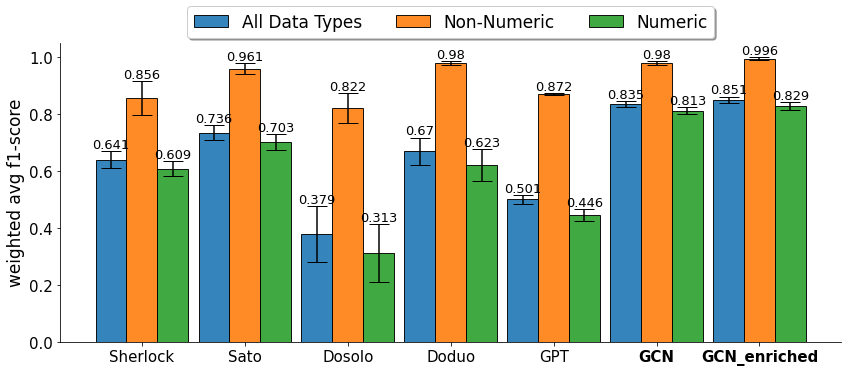

In [14]:
## plot results

# try:
#     df = df.drop([0])
# except:
#     pass

width = 0.3
fig, ax = plt.subplots(figsize=(14,5.5))

#metric = "macro avg f1-score"
metric = "weighted avg f1-score"

models = ["sherlock", "sato (shuffled cols)", "doduo (columnwise)", "doduo (tablewise shuffled)", "GPT (columnwise)", "GCN_Conv1", "GCN_Conv1_enriched"]
sport_domain = "overall"

bars = []
for model_idx, model in enumerate(models):
    bars.append(ax.bar([model_idx-(width)], round(df[(df["model"] == f"{model}") & (df["sport"] == sport_domain)][metric].mean(),3), yerr=df[(df["model"] == f"{model}") & (df["sport"] == sport_domain)][metric].std(), capsize=10, width=width, color="C0", label="All Data Types", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([model_idx], round(df[(df["model"] == f"{model}") & (df["sport"] == sport_domain)][f"textual {metric}"].mean(),3), yerr=df[(df["model"] == f"{model}") & (df["sport"] == sport_domain)][f"textual {metric}"].std(), capsize=10, width=width, color="C1", label="Non-Numeric", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([model_idx+(width)], round(df[(df["model"] == f"{model}") & (df["sport"] == sport_domain)][f"numerical {metric}"].mean(),3), yerr=df[(df["model"] == f"{model}") & (df["sport"] == sport_domain)][f"numerical {metric}"].std(), capsize=10, width=width, color="C2", label="Numeric", alpha=0.9, edgecolor="black"))
    
for bar in bars:
    try:
        ax.bar_label(bar, fontsize=13)
    except:
        pass  

model_names = ["Sherlock", "Sato", "Dosolo", "Doduo", "GPT", "GCN", "GCN_enriched"]
#plt.title("Models on SportsTables")
ax.set_xticks(np.arange(0,len(model_names),1))
ax.set_xticklabels(model_names)
ax.get_xticklabels()[-2].set_fontweight("bold")
ax.get_xticklabels()[-1].set_fontweight("bold")

ax.set_yticks(np.arange(0.0, 1.1, 0.2))
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.legend(handles=bars[:3], fancybox=True, shadow=True, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=3, fontsize=17)
ax.set_ylabel(metric, fontsize=17)
#plt.grid()
plt.savefig(f"./models_performance_{metric.split(' ')[0]}.png", bbox_inches="tight", dpi=300, transparent=True)
plt.show()

# GitTables plots

In [4]:
## data preparation
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from os.path import join
import os
from sklearn.preprocessing import LabelEncoder
from dotenv import load_dotenv
load_dotenv(override=True)
import json

# Filter out the specific warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

import sys
sys.path.append("..")

#from data_loader.GitTables_data_loader import get_LabelEncoder

def get_all_textual_semantic_types():
    with open(join(os.environ["GitTables"], "data", f"valid_semantic_types_10_0.7.json")) as f:
        textual_semantic_types = json.load(f)["textual_types"]
    
    return textual_semantic_types

def get_all_numerical_semantic_types():
    with open(join(os.environ["GitTables"], "data", f"valid_semantic_types_10_0.7.json")) as f:
        numerical_semantic_types = json.load(f)["numerical_types"]
    
    return numerical_semantic_types

def get_LabelEncoder():
    all_semantic_types = get_all_textual_semantic_types() + \
        get_all_numerical_semantic_types()
    label_enc = LabelEncoder()
    label_enc.fit(all_semantic_types)
    return label_enc

label_enc = get_LabelEncoder()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import classification_report

plt.rc("font", size=15)

data = []

for random_state in range(1,6):
    # ### collect sherlock overall results
    with open(f"/ext/daten-wi/slangenecker/sato/results/sherlock_log/type_gittables/sherlock_eval_{random_state}/outputs/predictions.json") as f:
        predictions = json.load(f)
        df = pd.DataFrame({"y_pred": label_enc.inverse_transform(predictions["y_pred"]), "y_true": label_enc.inverse_transform(predictions["y_true"]), "col_type": predictions["y_col_types"]})
        class_report = classification_report(df["y_true"].to_list(),df["y_pred"].to_list(), output_dict=True)
        text_class_report = classification_report(df[df["col_type"] == 0]["y_true"].to_list(),df[df["col_type"] == 0]["y_pred"].to_list(), output_dict=True)
        sherlock_num_class_report = classification_report(df[df["col_type"] == 1]["y_true"].to_list(),df[df["col_type"] == 1]["y_pred"].to_list(), output_dict=True)
        
        data.append(["sherlock", random_state, class_report["accuracy"], 
                     class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], class_report["weighted avg"]["support"], 
                     text_class_report["macro avg"]["f1-score"], text_class_report["weighted avg"]["f1-score"], text_class_report["weighted avg"]["support"], 
                     sherlock_num_class_report["macro avg"]["f1-score"], sherlock_num_class_report["weighted avg"]["f1-score"], sherlock_num_class_report["weighted avg"]["support"]])
    
    
    ## collect sato overall results
    with open(f"/ext/daten-wi/slangenecker/sato/results/CRF_log/type_gittables/CRF+LDA_eval_eval_{random_state}_False/outputs/predictions.json") as f:
        predictions = json.load(f)
        df = pd.DataFrame({"y_pred": label_enc.inverse_transform(predictions["y_pred"]), "y_true": label_enc.inverse_transform(predictions["y_true"]), "col_type": predictions["y_col_types"]})
        class_report = classification_report(df["y_true"].to_list(),df["y_pred"].to_list(), output_dict=True)
        text_class_report = classification_report(df[df["col_type"] == 0]["y_true"].to_list(),df[df["col_type"] == 0]["y_pred"].to_list(), output_dict=True)
        sato_num_class_report = classification_report(df[df["col_type"] == 1]["y_true"].to_list(),df[df["col_type"] == 1]["y_pred"].to_list(), output_dict=True)
        
        data.append(["sato", random_state, class_report["accuracy"], 
                     class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], class_report["weighted avg"]["support"], 
                     text_class_report["macro avg"]["f1-score"], text_class_report["weighted avg"]["f1-score"], text_class_report["weighted avg"]["support"], 
                     sato_num_class_report["macro avg"]["f1-score"], sato_num_class_report["weighted avg"]["f1-score"], sato_num_class_report["weighted avg"]["support"]])
        
    ## collect sato shuffled overall results
    with open(f"/ext/daten-wi/slangenecker/sato/results/CRF_log/type_gittables/CRF+LDA_eval_eval_{random_state}_True/outputs/predictions.json") as f:
        predictions = json.load(f)
        df = pd.DataFrame({"y_pred": label_enc.inverse_transform(predictions["y_pred"]), "y_true": label_enc.inverse_transform(predictions["y_true"]), "col_type": predictions["y_col_types"]})
        class_report = classification_report(df["y_true"].to_list(),df["y_pred"].to_list(), output_dict=True)
        text_class_report = classification_report(df[df["col_type"] == 0]["y_true"].to_list(),df[df["col_type"] == 0]["y_pred"].to_list(), output_dict=True)
        sato_shuffled_num_class_report = classification_report(df[df["col_type"] == 1]["y_true"].to_list(),df[df["col_type"] == 1]["y_pred"].to_list(), output_dict=True)
        
        data.append(["sato (shuffled)", random_state, class_report["accuracy"], 
                     class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], class_report["weighted avg"]["support"], 
                     text_class_report["macro avg"]["f1-score"], text_class_report["weighted avg"]["f1-score"], text_class_report["weighted avg"]["support"], 
                     sato_shuffled_num_class_report["macro avg"]["f1-score"], sato_shuffled_num_class_report["weighted avg"]["f1-score"], sato_shuffled_num_class_report["weighted avg"]["support"]])

    
    # ### collect sato shuffled cols overall results
    # with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}_True/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}_True.pt.json") as f:
    #     class_report = json.load(f)
    #     text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
    #     num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
    #     data.append(["sato (shuffled cols)", "overall", random_state, class_report["accuracy"], class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
        
    ### collect Doduo results
    try:
        with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/GitTables_single_bert_bert-base-uncased-bs16-ml-254-lr1e-05__GitTables-1.00_scFalse_rs{random_state}=GitTables.json_predictions.json") as f:
            predictions = json.load(f)
            df = pd.DataFrame({"y_pred": label_enc.inverse_transform(predictions["y_pred"]), "y_true": label_enc.inverse_transform(predictions["y_true"]), "col_type": predictions["y_col_type"]})
            class_report = classification_report(df["y_true"].to_list(),df["y_pred"].to_list(), output_dict=True)
            text_class_report = classification_report(df[df["col_type"] == 0]["y_true"].to_list(),df[df["col_type"] == 0]["y_pred"].to_list(), output_dict=True)
            doduo_col_num_class_report = classification_report(df[df["col_type"] == 1]["y_true"].to_list(),df[df["col_type"] == 1]["y_pred"].to_list(), output_dict=True)
            
            data.append(["doduo (columnwise)", random_state, class_report["accuracy"], 
                        class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], class_report["weighted avg"]["support"], 
                        text_class_report["macro avg"]["f1-score"], text_class_report["weighted avg"]["f1-score"], text_class_report["weighted avg"]["support"], 
                        doduo_col_num_class_report["macro avg"]["f1-score"], doduo_col_num_class_report["weighted avg"]["f1-score"], doduo_col_num_class_report["weighted avg"]["support"]])
    except Exception as err:
        print(err)
        print(f"Doduo/columnswise: No classification report for overall with random state {random_state}")
        
    ### collect Doduo results
    try:
        with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/GitTables_mosato_bert_bert-base-uncased-bs3-ml-10-lr1e-05__GitTables-1.00_scTrue_rs{random_state}=GitTables.json_predictions.json") as f:
            predictions = json.load(f)
            df = pd.DataFrame({"y_pred": label_enc.inverse_transform(predictions["y_pred"]), "y_true": label_enc.inverse_transform(predictions["y_true"]), "col_type": predictions["y_col_type"]})
            class_report = classification_report(df["y_true"].to_list(),df["y_pred"].to_list(), output_dict=True)
            text_class_report = classification_report(df[df["col_type"] == 0]["y_true"].to_list(),df[df["col_type"] == 0]["y_pred"].to_list(), output_dict=True)
            doduo_tab_num_class_report = classification_report(df[df["col_type"] == 1]["y_true"].to_list(),df[df["col_type"] == 1]["y_pred"].to_list(), output_dict=True)
            
            data.append(["doduo (tablewise shuffled)", random_state, class_report["accuracy"], 
                        class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], class_report["weighted avg"]["support"], 
                        text_class_report["macro avg"]["f1-score"], text_class_report["weighted avg"]["f1-score"], text_class_report["weighted avg"]["support"], 
                        doduo_tab_num_class_report["macro avg"]["f1-score"], doduo_tab_num_class_report["weighted avg"]["f1-score"], doduo_tab_num_class_report["weighted avg"]["support"]])
    except Exception as err:
        print(err)
        print(f"Doduo/tablewise: No classification report for overall with random state {random_state}")
        
        
    # ### collect gpt (ada/fine-tuned) model
    # try:
    #     with open(f"../gpt/results/classification_report_overall_False_{random_state}.json") as f:
    #         class_report = json.load(f)
    #         text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
    #         num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
    #         data.append(["GPT (tablewise)", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    # except:
    #     print(f"GPT / Tablewise: No classification report for overall with random state {random_state}")
        
    # ### collect gpt (ada/fine-tuned) model tablewise shuffled cols
    # try:
    #     with open(f"../gpt/results/classification_report_overall_True_{random_state}.json") as f:
    #         class_report = json.load(f)
    #         text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
    #         num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
    #         data.append(["GPT (tablewise/shuffled)", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    # except:
    #     print(f"GPT / Tablewise Shuffled Cols: No classification report for overall with random state {random_state}")
    
    ### collect gpt (ada/fine-tuned) model columnwise tokenization
    try:
        with open(f"../gpt/results/GitTables_predictions_True_{random_state}_0.7_columnwise.json") as f:
            predictions = json.load(f)
            # handle word predictions
            y_pred = []
            for x in predictions["y_pred"]:
                try:
                    y_pred.append(label_enc.inverse_transform([int(x)])[0])
                except:
                    y_pred.append("error")
            y_true = [int(x) for x in predictions["y_true"]]
            df = pd.DataFrame({"y_pred": y_pred, "y_true": label_enc.inverse_transform(y_true)})
            df["col_type"] = df['y_pred'].apply(lambda x: 0 if x.endswith('_tt') else 1)
            
            class_report = classification_report(df["y_true"].to_list(),df["y_pred"].to_list(), output_dict=True)
            text_class_report = classification_report(df[df["col_type"] == 0]["y_true"].to_list(),df[df["col_type"] == 0]["y_pred"].to_list(), output_dict=True)
            gpt_num_class_report = classification_report(df[df["col_type"] == 1]["y_true"].to_list(),df[df["col_type"] == 1]["y_pred"].to_list(), output_dict=True)
            
            data.append(["gpt", random_state, class_report["accuracy"], 
                        class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], class_report["weighted avg"]["support"], 
                        text_class_report["macro avg"]["f1-score"], text_class_report["weighted avg"]["f1-score"], text_class_report["weighted avg"]["support"], 
                        gpt_num_class_report["macro avg"]["f1-score"], gpt_num_class_report["weighted avg"]["f1-score"], gpt_num_class_report["weighted avg"]["support"]])
    except:
        print(f"GPT / Columnwise: No classification report for overall with random state {random_state}")
        
    
    # ### collect gcn overall results
    # try:
    #     with open(f"../output/SportsTables/CA_GCN_Conv1/columns/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr1e-05_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
    #         class_report = json.load(f)
    #         text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(class_report))
    #         num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(class_report))
    #         data.append(["GCN_Conv1", "overall", random_state, class_report["accuracy"],class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    # except:
    #     print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
        
    ### collect gcn overall results
    try:
        with open(f"../output/GitTables/CA_GCN_Conv1_enriched/enriched/classification_report/single_bert-base-uncased_ts0.2_ml254_nc219_bs3_rs{random_state}_lr5e-05_hf512_[]_scFalse_lf8_ss0.7_best_micro_f1.pt_predictions.json") as f:
            predictions = json.load(f)
            df = pd.DataFrame({"y_pred": predictions["y_pred"], "y_true": predictions["y_true"], "col_type": predictions["y_col_type"]})
            class_report = classification_report(df["y_true"].to_list(),df["y_pred"].to_list(), output_dict=True)
            text_class_report = classification_report(df[df["col_type"] == 0]["y_true"].to_list(),df[df["col_type"] == 0]["y_pred"].to_list(), output_dict=True)
            gcn_enriched_num_class_report = classification_report(df[df["col_type"] == 1]["y_true"].to_list(),df[df["col_type"] == 1]["y_pred"].to_list(), output_dict=True)
            
            data.append(["GCN_Conv1_enriched", random_state, class_report["accuracy"], 
                        class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], class_report["weighted avg"]["support"], 
                        text_class_report["macro avg"]["f1-score"], text_class_report["weighted avg"]["f1-score"], text_class_report["weighted avg"]["support"], 
                        gcn_enriched_num_class_report["macro avg"]["f1-score"], gcn_enriched_num_class_report["weighted avg"]["f1-score"], gcn_enriched_num_class_report["weighted avg"]["support"]])
    except:
        print(f"GCN_Conv1_enriched/columnswise: No classification report for overall with random state {random_state}")
        
    ### collect gcn shadow nums overall results
    try:
        with open(f"../output/GitTables/CA_GAT_enriched_shadow_nums/enriched_shadow_nums/classification_report/single_bert-base-uncased_ts0.2_ml254_nc219_bs3_rs{random_state}_lr5e-05_hf512_[]_scFalse_lf4_ss0.7_best_micro_f1.pt_predictions.json") as f:
            predictions = json.load(f)
            df = pd.DataFrame({"y_pred": predictions["y_pred"], "y_true": predictions["y_true"], "col_type": predictions["y_col_type"]})
            class_report = classification_report(df["y_true"].to_list(),df["y_pred"].to_list(), output_dict=True)
            text_class_report = classification_report(df[df["col_type"] == 0]["y_true"].to_list(),df[df["col_type"] == 0]["y_pred"].to_list(), output_dict=True)
            gcn_enriched_num_class_report = classification_report(df[df["col_type"] == 1]["y_true"].to_list(),df[df["col_type"] == 1]["y_pred"].to_list(), output_dict=True)
            
            data.append(["GAT_enriched_connected_nums", random_state, class_report["accuracy"], 
                        class_report["macro avg"]["f1-score"], class_report["weighted avg"]["f1-score"], class_report["weighted avg"]["support"], 
                        text_class_report["macro avg"]["f1-score"], text_class_report["weighted avg"]["f1-score"], text_class_report["weighted avg"]["support"], 
                        gcn_enriched_num_class_report["macro avg"]["f1-score"], gcn_enriched_num_class_report["weighted avg"]["f1-score"], gcn_enriched_num_class_report["weighted avg"]["support"]])
    except:
        print(f"GCN_GAT_enriched_shadow_nums/columnswise: No classification report for overall with random state {random_state}")    
    

df = pd.DataFrame(data, columns=["model","random_state", "accuracy", "macro avg f1-score", "weighted avg f1-score", "support", 
                                 "textual macro avg f1-score", "textual weighted avg f1-score", "textual_support", 
                                 "numerical macro avg f1-score", "numerical weighted avg f1-score", "numerical_support"])

GPT / Columnwise: No classification report for overall with random state 2
GPT / Columnwise: No classification report for overall with random state 3
GCN_Conv1_enriched/columnswise: No classification report for overall with random state 3
GPT / Columnwise: No classification report for overall with random state 4
GCN_Conv1_enriched/columnswise: No classification report for overall with random state 4
GPT / Columnwise: No classification report for overall with random state 5
GCN_Conv1_enriched/columnswise: No classification report for overall with random state 5


In [31]:
random_state = 1
with open(f"../gpt/results/GitTables_predictions_True_{random_state}_0.7_columnwise.json") as f:
    predictions = json.load(f)
    # handle word predictions
    y_pred = []
    for x in predictions["y_pred"]:
        try:
            y_pred.append(label_enc.inverse_transform([int(x)])[0])
        except:
            y_pred.append("error")
    y_true = [int(x) for x in predictions["y_true"]]
    df = pd.DataFrame({"y_pred": y_pred, "y_true": label_enc.inverse_transform(y_true)})
    df["col_type"] = df['y_pred'].apply(lambda x: 0 if x.endswith('_tt') else 1)
    
    class_report = classification_report(df["y_true"].to_list(),df["y_pred"].to_list(), output_dict=True)
    text_class_report = classification_report(df[df["col_type"] == 0]["y_true"].to_list(),df[df["col_type"] == 0]["y_pred"].to_list(), output_dict=True)
    gpt_num_class_report = classification_report(df[df["col_type"] == 1]["y_true"].to_list(),df[df["col_type"] == 1]["y_pred"].to_list(), output_dict=True)

In [32]:
print("Overall Class Report:")
print(class_report['weighted avg']["f1-score"])
print(class_report['macro avg']["f1-score"])

print("Textual Class Report:")
print(text_class_report['weighted avg']["f1-score"])
print(text_class_report['macro avg']["f1-score"])

print("Numerical Class Report:")
print(gpt_num_class_report['weighted avg']["f1-score"])
print(gpt_num_class_report['macro avg']["f1-score"])

Overall Class Report:
0.6104557522533683
0.21185473931822085
Textual Class Report:
0.9378331534124954
0.27688431938127456
Numerical Class Report:
0.5314803180711775
0.14304453866082223


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

true_semantic_types = predictions["y_true"] # List of true semantic types
predicted_semantic_types = predictions["y_pred"]  # List of predicted semantic types
specific_type = "source_nt"  # Replace with the specific type you want to analyze

# Find indices where the specific type was predicted
specific_type_indices = [i for i, true_type in enumerate(true_semantic_types) if true_type == specific_type]

# Extract corresponding true types for the specific type predictions
true_types_for_specific_type = [true_semantic_types[i] for i in specific_type_indices]
predicted_types_for_specific_type = [predicted_semantic_types[i] for i in specific_type_indices]

# Count the occurrences of unique values
value_counts = pd.Series(predicted_types_for_specific_type).value_counts()

# Create a DataFrame from the value counts
df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values})

# Print the DataFrame
print(df)

          Value  Count
0  long name_nt      9
1     length_nt      3


In [3]:
#df[['model', 'random_state', 'accuracy', 'macro avg f1-score',
#       'weighted avg f1-score', 'textual macro avg f1-score',
#       'textual weighted avg f1-score',
#       'numerical macro avg f1-score', 'numerical weighted avg f1-score']]
df

,model,random_state,accuracy,macro avg f1-score,weighted avg f1-score,support,textual macro avg f1-score,textual weighted avg f1-score,textual_support,numerical macro avg f1-score,numerical weighted avg f1-score,numerical_support
0,sherlock,1,0.773884,0.505329,0.772487,14183,0.699261,0.987842,2683,0.430695,0.722630,11500
1,sato,1,0.955087,0.608961,0.954710,14183,0.764712,0.989744,2683,0.554054,0.946670,11500
2,sato (shuffled),1,0.778961,0.531737,0.778127,14183,0.700306,0.987815,2683,0.460099,0.729539,11500
3,doduo (columnwise),1,0.600353,0.325847,0.604575,14180,0.724982,0.989394,2681,0.220823,0.515747,11499
4,doduo (tablewise shuffled),1,0.809702,0.505464,0.808700,14183,0.692970,0.991273,2683,0.431129,0.766418,11500
5,GCN_Conv1_enriched,1,0.816682,0.508745,0.811298,14183,0.827274,0.988246,2683,0.447052,0.770049,11500
6,GAT_enriched_connected_nums,1,0.854513,0.569380,0.851017,14180,0.867553,0.992226,2681,0.508885,0.818129,11499
7,sherlock,2,0.774592,0.474567,0.771544,14334,0.705911,0.985867,2713,0.394861,0.722009,11621
8,sato,2,0.946840,0.620251,0.944550,14334,0.720593,0.988861,2713,0.551470,0.934802,11621
9,sato (shuffled),2,0.781080,0.507282,0.778715,14334,0.738591,0.989879,2713,0.425130,0.730037,11621


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = gcn_enriched_num_class_report
#data = sato_num_class_report
try:
    del data["accuracy"]
except:
    print("Halle")


# Convert data into a list of dictionaries excluding 'macro avg' and 'weighted avg'
data_list = [{'class': key, **values} for key, values in data.items() if key not in ['macro avg', 'weighted avg']]

# Create a DataFrame from the list
df_gcn_enriched = pd.DataFrame(data_list)

# Sort the DataFrame by 'support' in descending order
df_gcn_enriched.sort_values(by='support', ascending=False, inplace=True)

import pandas as pd
import matplotlib.pyplot as plt

# Example data 
#data = gcn_enriched_num_class_report
data = sato_num_class_report
try:
    del data["accuracy"]
except:
    pass


# Convert data into a list of dictionaries excluding 'macro avg' and 'weighted avg'
data_list = [{'class': key, **values} for key, values in data.items() if key not in ['macro avg', 'weighted avg']]

# Create a DataFrame from the list
df_sato = pd.DataFrame(data_list)

# Sort the DataFrame by 'support' in descending order
df_sato.sort_values(by='support', ascending=False, inplace=True)

merged_df = df_gcn_enriched.merge(df_sato, on="class", suffixes=["_gnn", "_sato"])

In [5]:
merged_df[merged_df["f1-score_sato"] > merged_df["f1-score_gnn"]][["class","f1-score_gnn","f1-score_sato", "support_gnn", "support_sato"]]

,class,f1-score_gnn,f1-score_sato,support_gnn,support_sato
0,start date time_nt,0.914286,0.988506,131,131
1,size thumbnail_nt,0.952381,0.991228,115,115
3,image size_nt,0.959641,1.000000,113,113
5,id_nt,0.926174,0.980132,77,77
6,time_nt,0.821429,0.949153,60,60
8,position_nt,0.989011,1.000000,45,45
9,cost_nt,0.967033,0.988764,44,44
12,year_nt,0.867925,0.962963,28,28
15,long name_nt,0.263736,0.600000,20,20
16,length_nt,0.373333,0.848485,16,16


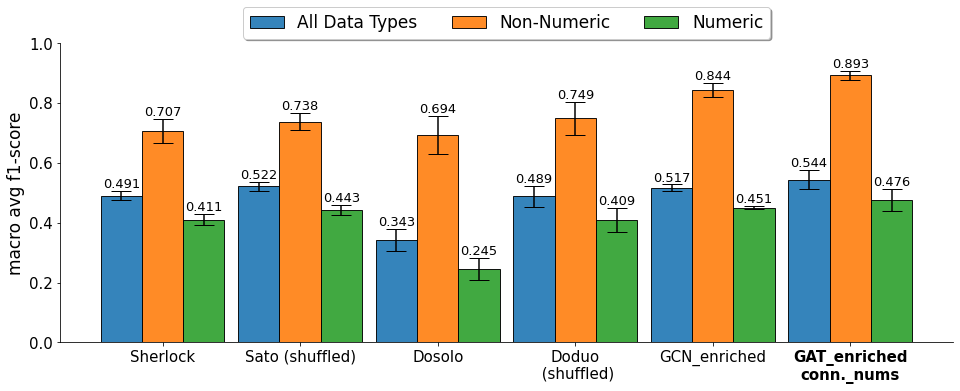

In [6]:
## plot results

# try:
#     df = df.drop([0])
# except:
#     pass

width = 0.3
fig, ax = plt.subplots(figsize=(16,5.5))

metric = "macro avg f1-score"
#metric = "weighted avg f1-score"

#models = ["sherlock", "sato (shuffled)", "doduo (columnwise)", "doduo (tablewise shuffled)", "GPT (columnwise)", "GCN_Conv1", "GCN_Conv1_enriched"]
models = ["sherlock", "sato (shuffled)", "doduo (columnwise)", "doduo (tablewise shuffled)", "GCN_Conv1_enriched", "GAT_enriched_connected_nums"]
#models = ["sherlock", "sato (shuffled)", "GCN_Conv1_enriched", "doduo (tablewise shuffled)", "GAT_enriched_connected_nums"]
#models = ["sherlock", "sato (shuffled)", "GCN_Conv1_enriched"]

bars = []
for model_idx, model in enumerate(models):
    bars.append(ax.bar([model_idx-(width)], 
                       round(df[(df["model"] == f"{model}")][metric].mean(),3), 
                       yerr=df[(df["model"] == f"{model}")][metric].std(), 
                       capsize=10, width=width, color="C0", label="All Data Types", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([model_idx], 
                       round(df[(df["model"] == f"{model}")][f"textual {metric}"].mean(),3), 
                       yerr=df[(df["model"] == f"{model}")][f"textual {metric}"].std(), 
                       capsize=10, width=width, color="C1", label="Non-Numeric", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([model_idx+(width)], 
                       round(df[(df["model"] == f"{model}")][f"numerical {metric}"].mean(),3), 
                       yerr=df[(df["model"] == f"{model}")][f"numerical {metric}"].std(), 
                       capsize=10, width=width, color="C2", label="Numeric", alpha=0.9, edgecolor="black"))
    
for bar in bars:
    #ax.bar_label(bar, fontsize=13)
    try:
        ax.bar_label(bar, fontsize=13)
    except:
        pass  

#model_names = ["Sherlock", "Sato", "Dosolo", "Doduo", "GPT", "GCN", "GCN_enriched"]
#model_names = ["Sherlock", "Sato", "Dosolo", "Doduo", "GCN_enriched"]
model_names = ["Sherlock", "Sato (shuffled)", "Dosolo", "Doduo\n (shuffled)", "GCN_enriched", "GAT_enriched\nconn._nums"]
#model_names = ["Sherlock", "Sato", "GCN_enriched"]
#plt.title("Models on SportsTables")
ax.set_xticks(np.arange(0,len(model_names),1))
ax.set_xticklabels(model_names)
#ax.get_xticklabels()[-2].set_fontweight("bold")
ax.get_xticklabels()[-1].set_fontweight("bold")
for label in ax.get_xticklabels():
    label.set_fontsize(15)

ax.set_yticks(np.arange(0.0, 1.1, 0.2))
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.legend(handles=bars[:3], fancybox=True, shadow=True, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=3, fontsize=17)
ax.set_ylabel(metric, fontsize=17)
#ax.set_xlabel(metric, fontsize=17)
#plt.grid()
#plt.savefig(f"./models_performance_{metric.split(' ')[0]}.png", bbox_inches="tight", dpi=300, transparent=True)
plt.show()

# Scores per Semantic Type

In [2]:
import json
import pandas as pd

random_state = 1

### collect sherlock overall results
with open(f"/home/slangenecker/sato/results/sherlock_log/type_SportsTables/sherlock_eval_overall_{random_state}/outputs/classification_report.json") as f:
    sherlock_class_report = json.load(f)


### collect sato overall results
with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}.pt.json") as f:
    sato_class_report = json.load(f)


### collect sato shuffled cols overall results
with open(f"/home/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}_True/outputs/classification_report_CRF+LDA_retrain_overall_{random_state}_True.pt.json") as f:
    sato_shuffled_class_report = json.load(f)
   
### collect Doduo results
try:
    with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_single_bert_bert-base-uncased-bs16-ml-254__SportsTables-1.00_scFalse_rs{random_state}_['baseball', 'basketball', 'football', 'hockey', 'soccer']=SportsTables.json_f1_micro_class_report.json") as f:
        dosolo_class_report = json.load(f)
except:
    print(f"Doduo/columnswise: No classification report for overall with random state {random_state}")
    
### collect Doduo results
try:
    with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_mosato_bert_bert-base-uncased-bs1-ml-10__SportsTables-1.00_scTrue_rs{random_state}_['baseball', 'basketball', 'football', 'hockey', 'soccer']=SportsTables.json_f1_micro_class_report.json") as f:
        doduo_class_report = json.load(f)
except:
    print(f"Doduo/columnswise: No classification report for overall with random state {random_state}")

### collect gcn overall results
try:
    with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr1e-05_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
        pythagoras_class_report = json.load(f)
except:
    print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")


pythagoras_numerical_class_report = get_complete_numerical_class_report(pythagoras_class_report)
df = pd.DataFrame(pythagoras_numerical_class_report).T.reset_index()
df["random_state"] = random_state

### collect the 1:1 predictions
with open(f"../output/SportsTables/CA_GCN_Conv1/columns/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr1e-05_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt_predictions.json") as f:
    predictions = json.load(f)


# ### collect the 1:1 predictions
# with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr1e-05_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt_predictions.json") as f:
#     predictions = json.load(f)
    
df_predictions = pd.DataFrame({"true_label": predictions["y_true"], "predicted": predictions["y_pred"]})

In [3]:
data = get_inverse_transformed_labeled_class_report(sato_shuffled_class_report)
try:
    del data["accuracy"]
except:
    print("Hallo")


# Convert data into a list of dictionaries excluding 'macro avg' and 'weighted avg'
data_list = [{'semantic_type': key, **values} for key, values in data.items() if key not in ['macro avg', 'weighted avg']]

# Create a DataFrame from the list
df = pd.DataFrame(data_list)

# Sort the DataFrame by 'support' in descending order
df.sort_values(by='support', ascending=False, inplace=True)


# Example data 
#data = gcn_enriched_num_class_report
data = pythagoras_class_report
try:
    del data["accuracy"]
except:
    pass


# Convert data into a list of dictionaries excluding 'macro avg' and 'weighted avg'
data_list = [{'semantic_type': key, **values} for key, values in data.items() if key not in ['macro avg', 'weighted avg']]

# Create a DataFrame from the list
df_pythagoras = pd.DataFrame(data_list)

# Sort the DataFrame by 'support' in descending order
df_pythagoras.sort_values(by='support', ascending=False, inplace=True)

df_sem_types = df_pythagoras.merge(df, on="semantic_type", suffixes=["_pythagoras", "_sato"])

In [4]:
df_sem_types

,semantic_type,precision_pythagoras,recall_pythagoras,f1-score_pythagoras,support_pythagoras,precision_sato,recall_sato,f1-score_sato,support_sato
0,rank,1.000000,1.0,1.000000,148,0.993289,1.000000,0.996633,148
1,football.team.name,1.000000,1.0,1.000000,61,1.000000,0.983607,0.991736,61
2,soccer.player.name,1.000000,1.0,1.000000,54,0.981481,0.981481,0.981481,54
3,soccer.team.goals,0.981818,1.0,0.990826,54,0.609375,0.722222,0.661017,54
4,hockey.team.name,1.000000,1.0,1.000000,52,0.981132,1.000000,0.990476,52
...,...,...,...,...,...,...,...,...,...
379,football.team.playoffs_participations,0.000000,0.0,0.000000,1,0.000000,0.000000,0.000000,1
380,football.team.division_championship_wins,0.000000,0.0,0.000000,1,0.000000,0.000000,0.000000,1
381,football.team.conference_championship_wins,0.000000,0.0,0.000000,1,0.000000,0.000000,0.000000,1
382,football.team.championship_wins,0.000000,0.0,0.000000,1,0.000000,0.000000,0.000000,1


In [5]:
df_num_sem_types = df_sem_types[df_sem_types["semantic_type"].isin(get_all_numerical_semantic_types())]
df_text_sem_types = df_sem_types[df_sem_types["semantic_type"].isin(get_all_textual_semantic_types())]

In [6]:
print(len(df_num_sem_types[df_num_sem_types["f1-score_pythagoras"] > df_num_sem_types["f1-score_sato"]]))
print(len(df_num_sem_types[df_num_sem_types["f1-score_sato"] > df_num_sem_types["f1-score_pythagoras"]]))
print(len(df_num_sem_types[df_num_sem_types["f1-score_sato"] == df_num_sem_types["f1-score_pythagoras"]]))

202
74
80


/tmp/ipykernel_3206593/2788466239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["f1-score_diff"] = df_plot["f1-score_pythagoras"] - df_plot["f1-score_sato"]


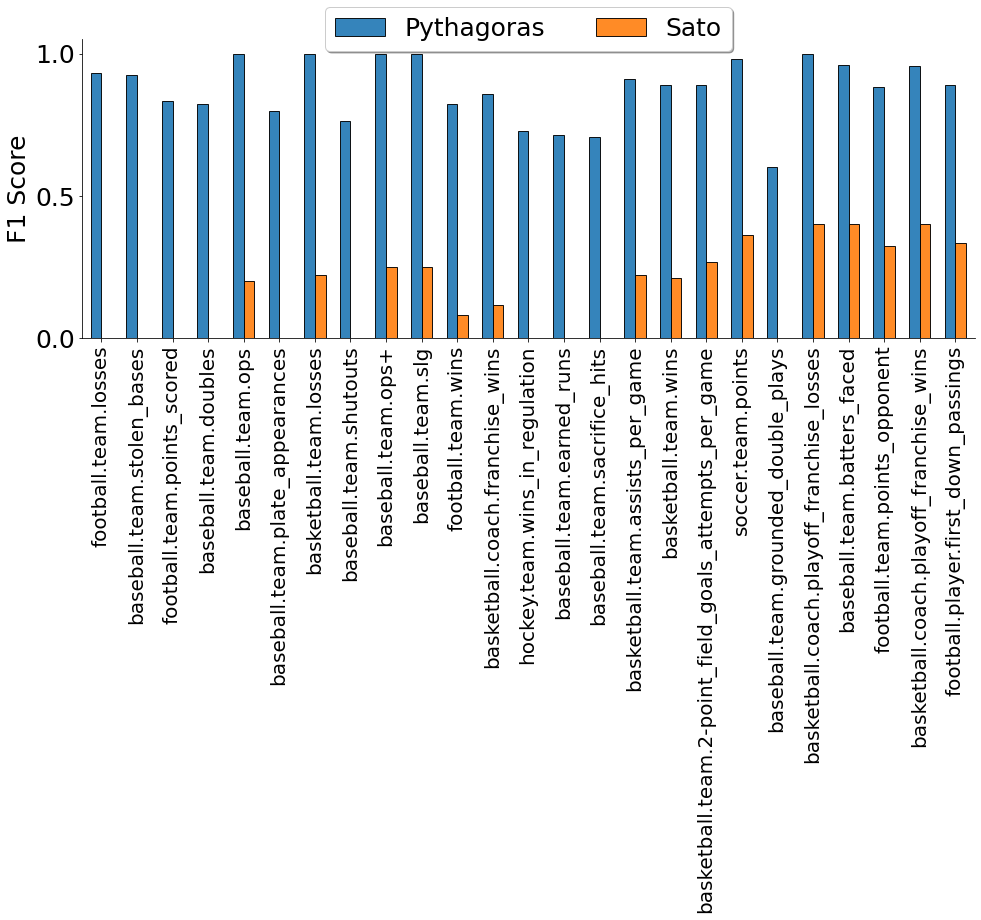

In [19]:
## prepare data
df_plot = df_num_sem_types
df_plot["f1-score_diff"] = df_plot["f1-score_pythagoras"] - df_plot["f1-score_sato"] 
df_plot = df_plot[df_plot["f1-score_pythagoras"] > df_plot["f1-score_sato"]].sort_values(by="f1-score_diff", ascending=False)[:25]#.sort_values(by="f1-score_pythagoras", ascending=False)

## plot results
import matplotlib.pyplot as plt
import numpy as np

width = 0.3
fig, ax = plt.subplots(figsize=(16,5.5))

metric = "f1-score"

models = ["sherlock", "sato (shuffled)", "GCN_Conv1_enriched", "doduo (tablewise shuffled)", "GAT_enriched_connected_nums"]

semantic_types = df_plot["semantic_type"].tolist()

bars = []
for sem_type_idx, semantic_type in enumerate(semantic_types):
    bars.append(ax.bar([(sem_type_idx+0)-(width/2)], 
                       df_plot[(df_plot["semantic_type"] == f"{semantic_type}")][f"{metric}_pythagoras"],
                       capsize=10, width=width, color="C0", label="Pythagoras", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([(sem_type_idx+0)+(width/2)], 
                       df_plot[(df_plot["semantic_type"] == f"{semantic_type}")][f"{metric}_sato"], 
                       capsize=10, width=width, color="C1", label="Sato", alpha=0.9, edgecolor="black"))
    
# for bar in bars:
#     #ax.bar_label(bar, fontsize=13)
#     try:
#         ax.bar_label(bar, fontsize=13)
#     except:
#         pass  


#plt.title("Models on SportsTables")
ax.set_xticks(np.arange(0,len(semantic_types),1))
ax.set_xticklabels(semantic_types, rotation=90)
#ax.get_xticklabels()[-2].set_fontweight("bold")
#ax.get_xticklabels()[-1].set_fontweight("bold")
for label in ax.get_xticklabels():
    label.set_fontsize(20)
for label in ax.get_yticklabels():
    label.set_fontsize(25)


ax.set_yticks(np.arange(0.0, 1.1, 0.5))
# Hide the right and top spines
ax.spines.right.set_visible(False)

ax.spines.top.set_visible(False)
ax.legend(handles=bars[:2], fancybox=True, shadow=True, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=3, fontsize=25)
ax.set_ylabel("F1 Score", fontsize=25)
#ax.set_xlabel(metric, fontsize=17)
#plt.grid()

plt.margins(x=0.01, tight=True)
plt.savefig(f"./Pythagoras_better_Sato_sem_types.pdf", bbox_inches="tight", dpi=600, transparent=True)
plt.show()

/tmp/ipykernel_3206593/3094985570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["f1-score_diff"] = df_plot["f1-score_pythagoras"] - df_plot["f1-score_sato"]


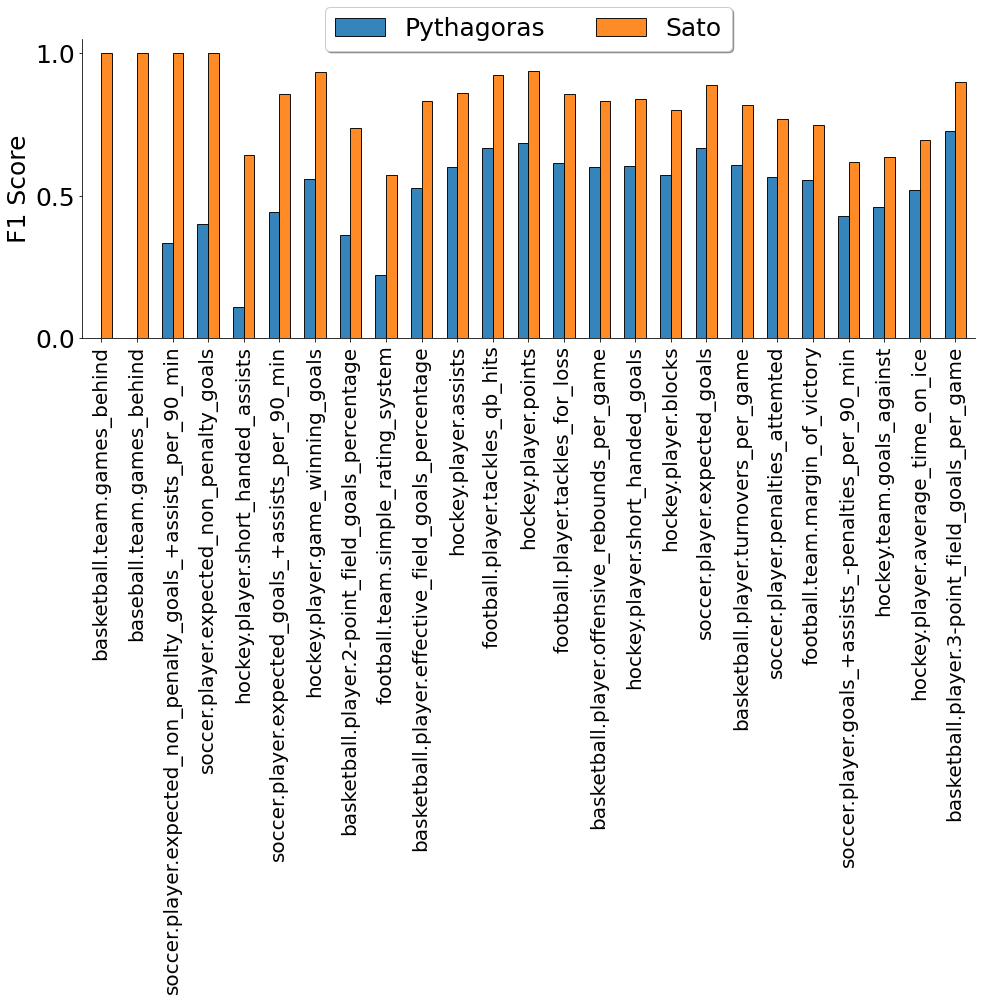

In [21]:
## prepare data
df_plot = df_num_sem_types
df_plot["f1-score_diff"] = df_plot["f1-score_pythagoras"] - df_plot["f1-score_sato"] 
df_plot = df_plot[df_plot["f1-score_pythagoras"] < df_plot["f1-score_sato"]].sort_values(by="f1-score_diff", ascending=True)[:25]#.sort_values(by="f1-score_pythagoras", ascending=False)

## plot results
import matplotlib.pyplot as plt
import numpy as np

width = 0.3
fig, ax = plt.subplots(figsize=(16,5.5))

metric = "f1-score"

models = ["sherlock", "sato (shuffled)", "GCN_Conv1_enriched", "doduo (tablewise shuffled)", "GAT_enriched_connected_nums"]

semantic_types = df_plot["semantic_type"].tolist()

bars = []
for sem_type_idx, semantic_type in enumerate(semantic_types):
    bars.append(ax.bar([(sem_type_idx+0)-(width/2)], 
                       df_plot[(df_plot["semantic_type"] == f"{semantic_type}")][f"{metric}_pythagoras"],
                       capsize=10, width=width, color="C0", label="Pythagoras", alpha=0.9, edgecolor="black"))
    bars.append(ax.bar([(sem_type_idx+0)+(width/2)], 
                       df_plot[(df_plot["semantic_type"] == f"{semantic_type}")][f"{metric}_sato"], 
                       capsize=10, width=width, color="C1", label="Sato", alpha=0.9, edgecolor="black"))
    
# for bar in bars:
#     #ax.bar_label(bar, fontsize=13)
#     try:
#         ax.bar_label(bar, fontsize=13)
#     except:
#         pass  


#plt.title("Models on SportsTables")
ax.set_xticks(np.arange(0,len(semantic_types),1))
ax.set_xticklabels(semantic_types, rotation=90)
#ax.get_xticklabels()[-2].set_fontweight("bold")
#ax.get_xticklabels()[-1].set_fontweight("bold")
for label in ax.get_xticklabels():
    label.set_fontsize(20)

for label in ax.get_yticklabels():
    label.set_fontsize(25)

ax.set_yticks(np.arange(0.0, 1.1, 0.5))
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.legend(handles=bars[:2], fancybox=True, shadow=True, loc="upper center", bbox_to_anchor=(0.5,1.15), ncol=3, fontsize=25)
ax.set_ylabel("F1 Score", fontsize=25)
#ax.set_xlabel(metric, fontsize=17)
#plt.grid()

plt.margins(x=0.01, tight=True)
plt.savefig(f"./Sato_better_Pythagoras_sem_types.pdf", bbox_inches="tight", dpi=600, transparent=True)
plt.show()

In [7]:
df_num_sem_types["f1-diff"] = abs(df_num_sem_types["f1-score_pythagoras"] - df_num_sem_types["f1-score_sato"])
df_num_sem_types

/tmp/ipykernel_3300339/944899853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_sem_types["f1-diff"] = abs(df_num_sem_types["f1-score_pythagoras"] - df_num_sem_types["f1-score_sato"])


,semantic_type,precision_pythagoras,recall_pythagoras,f1-score_pythagoras,support_pythagoras,precision_sato,recall_sato,f1-score_sato,support_sato,f1-diff
0,rank,1.000000,1.000000,1.000000,148,0.993289,1.000000,0.996633,148,0.003367
3,soccer.team.goals,0.981818,1.000000,0.990826,54,0.609375,0.722222,0.661017,54,0.329809
6,football.player.age,1.000000,1.000000,1.000000,45,0.978261,1.000000,0.989011,45,0.010989
7,football.player.games_played,1.000000,0.977778,0.988764,45,1.000000,1.000000,1.000000,45,0.011236
8,football.player.games_started,1.000000,0.977778,0.988764,45,0.978261,1.000000,0.989011,45,0.000247
...,...,...,...,...,...,...,...,...,...,...
379,football.team.playoffs_participations,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,1,0.000000
380,football.team.division_championship_wins,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,1,0.000000
381,football.team.conference_championship_wins,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,1,0.000000
382,football.team.championship_wins,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,1,0.000000


[]

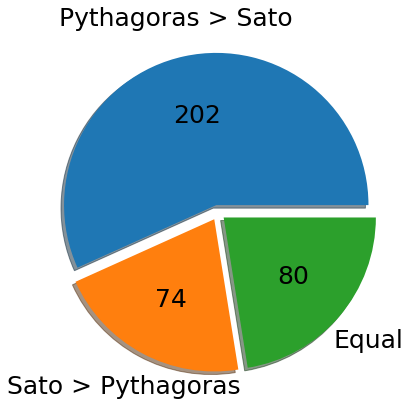

In [143]:
## circle diagramm
import matplotlib.pyplot as plt

labels = ['Pythagoras > Sato', 'Sato > Pythagoras', 'Equal']
pythagoras_better = len(df_num_sem_types[df_num_sem_types["f1-score_pythagoras"] > df_num_sem_types["f1-score_sato"]])
sato_better = len(df_num_sem_types[df_num_sem_types["f1-score_sato"] > df_num_sem_types["f1-score_pythagoras"]])
equal = len(df_num_sem_types[df_num_sem_types["f1-score_sato"] == df_num_sem_types["f1-score_pythagoras"]])

sizes = [pythagoras_better, sato_better, equal]

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(sizes, labels=labels, shadow=True, explode=[0.05,0.05,0.05], labeldistance=1.25, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100), textprops={'fontsize': 25, "horizontalalignment":'center'})
plt.savefig(f"./pie_chart.pdf", bbox_inches="tight", dpi=600, transparent=True)
plt.plot()

1.1 0.19999999999999996
2.1 0.09980798771121346


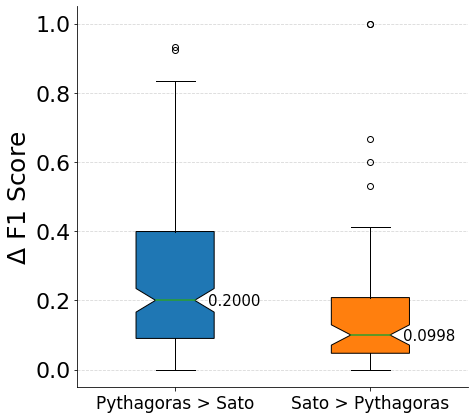

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# candle plots
pythagoras_better = df_num_sem_types[df_num_sem_types["f1-score_pythagoras"] > df_num_sem_types["f1-score_sato"]]["f1-diff"].tolist()
sato_better = df_num_sem_types[df_num_sem_types["f1-score_pythagoras"] < df_num_sem_types["f1-score_sato"]]["f1-diff"].tolist()


fig, ax = plt.subplots(figsize=(7,7))
 
# Creating plot
bp = ax.boxplot([pythagoras_better, sato_better], patch_artist=True, meanline=False, notch=True, medianprops = dict(color = "C2", linewidth = 1.5), widths=0.4)

ax.set_xticklabels(["Pythagoras > Sato", "Sato > Pythagoras"])
for label in ax.get_xticklabels():
    label.set_fontsize(17)

for label in ax.get_yticklabels():
    label.set_fontsize(22)

# fill with colors
colors = ['C0', 'C1']
for bplot in [bp]:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
ax.set_ylabel("$\Delta$ F1 Score", fontsize=25)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

for line in bp['medians']:
  # get position data for median line
  x, y = line.get_xydata()[1]  # top of median line
  print(x,y)
  # overlay median value
  plt.text(x+0.2, y-0.015, '%.4f' % y, horizontalalignment='center', fontsize=15)  # draw above, centered
 
# show plot
plt.margins(x=0.001, tight=True)
ax.yaxis.grid(linestyle="--",alpha=0.5)
plt.savefig(f"./boxplot.pdf", bbox_inches="tight", dpi=600, transparent=True)

plt.show()

In [7]:
df_predictions = df_predictions[(df_predictions["true_label"].isin(bad_sem_types)) | (df_predictions["predicted"].isin(bad_sem_types))]


[Text(0, 0, 'football.team.rushing_attempted'),
 Text(1, 0, 'football.team.division_championship_wins'),
 Text(2, 0, 'baseball.team.games_played'),
 Text(3, 0, 'year'),
 Text(4, 0, 'football.team.simple_rating_system'),
 Text(5, 0, 'baseball.team.strikeouts'),
 Text(6, 0, 'football.team.playoffs_participations'),
 Text(7, 0, 'baseball.team.runs_allowed_per_game'),
 Text(8, 0, 'baseball.team.bases_on_balls'),
 Text(9, 0, 'basketball.team.free_throws_per_game'),
 Text(10, 0, 'football.team.championship_wins'),
 Text(11, 0, 'football.team.playoffs_total_wins'),
 Text(12, 0, 'hockey.player.quality_starts'),
 Text(13, 0, 'soccer.player.name'),
 Text(14, 0, 'hockey.player.quality_starts_percentage'),
 Text(15, 0, 'football.team.total_losses'),
 Text(16, 0, 'football.player.name'),
 Text(17, 0, 'football.team.offensive_srs'),
 Text(18, 0, 'baseball.team.era'),
 Text(19, 0, 'football.team.super_bowl_wins'),
 Text(20, 0, 'basketball.team.turnovers_per_game'),
 Text(21, 0, 'baseball.team.fip'),


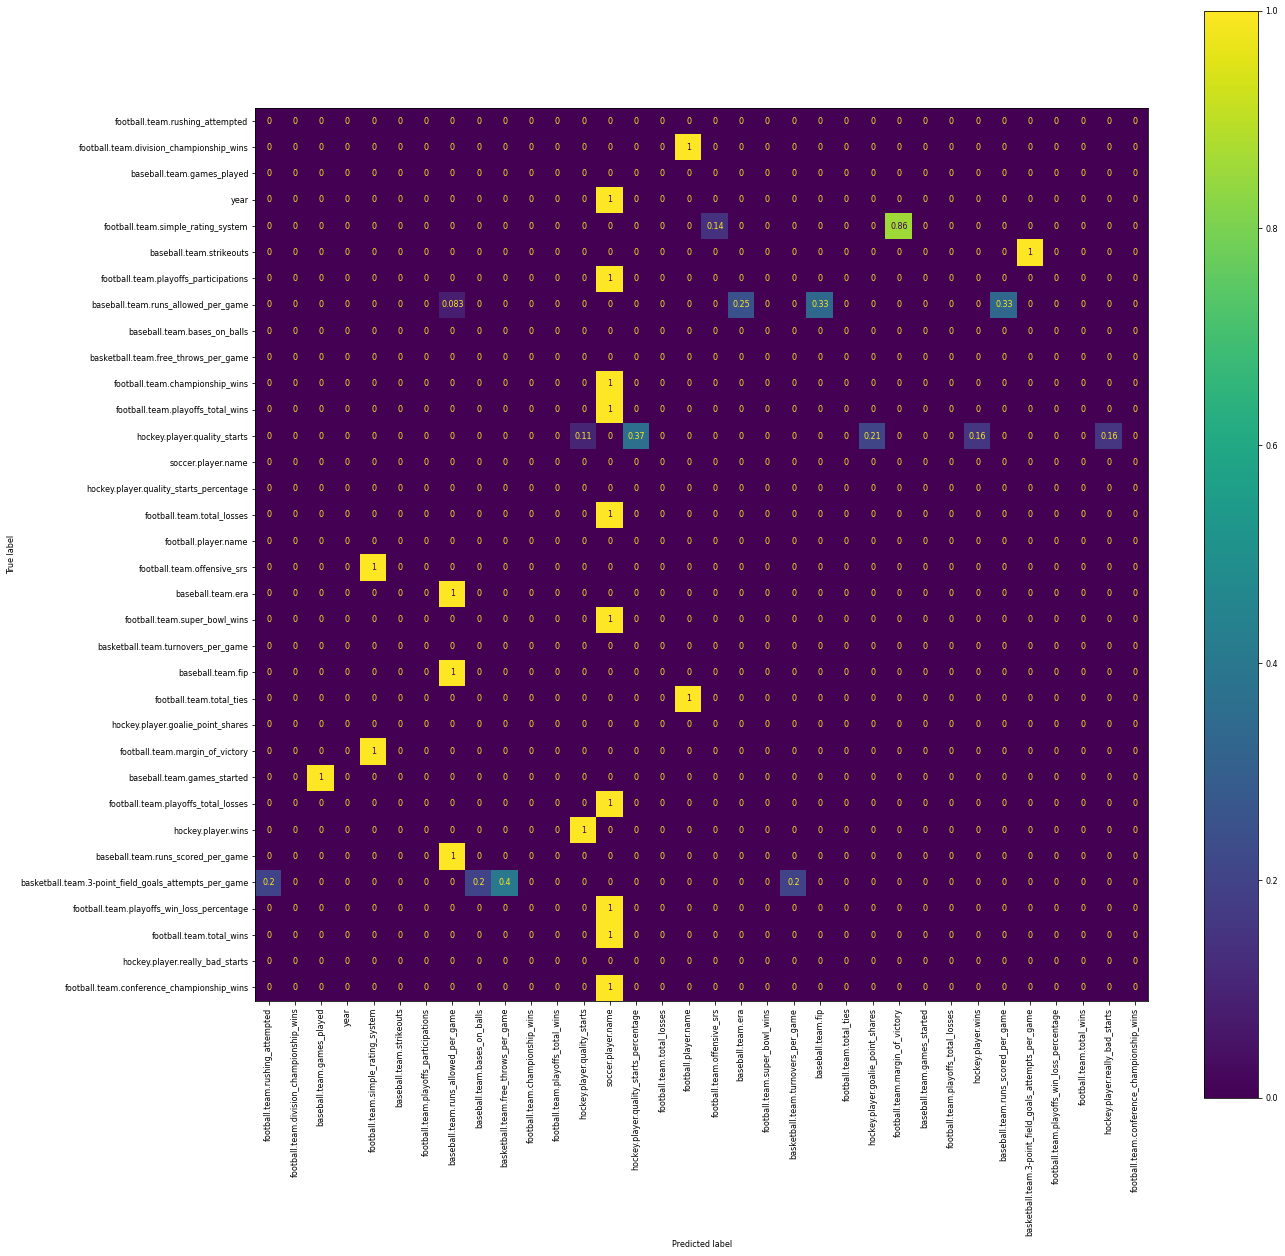

In [8]:
# plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

y_true = df_predictions["true_label"].tolist()
y_pred = df_predictions["predicted"].tolist()

confusion_matrix = confusion_matrix(y_true, y_pred, labels=list(set(y_true + y_pred)), normalize="true")
#confusion_matrix = confusion_matrix(predictions["y_true"], predictions["y_pred"])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=list(set(y_true + y_pred)))


plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(figsize=(20,20))
cm_display.plot(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Ablation Studies Results

In [2]:
import json

data = []
for random_state in [1]:
    ### collect gcn overall results
    try:
        with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr1e-05_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt.json") as f:
            pythagoras_class_report = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report))
            data.append(["Pythagoras", random_state, pythagoras_class_report["accuracy"],pythagoras_class_report["macro avg"]["f1-score"], pythagoras_class_report["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"GCN_Conv1/columnswise: No classification report for overall with random state {random_state}")
    
    ### collect gcn overall results
    try:
        with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr0.0001_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_lf12_ttcFalse_ctcTrue_nSFtcTrue_best_micro_f1.pt.json") as f:
            pythagoras_class_report_false_true_true = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_false_true_true))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_false_true_true))
            data.append(["w/o tablename", random_state, pythagoras_class_report_false_true_true["accuracy"],pythagoras_class_report_false_true_true["macro avg"]["f1-score"], pythagoras_class_report_false_true_true["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"w/o tablename: No classification report for overall with random state {random_state}")
        
    ### collect gcn overall results
    try:
        with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr0.0001_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_lf12_ttcTrue_ctcFalse_nSFtcTrue_best_micro_f1.pt.json") as f:
            pythagoras_class_report_true_false_true = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_true_false_true))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_true_false_true))
            data.append(["w/o text_to_num", random_state, pythagoras_class_report_true_false_true["accuracy"],pythagoras_class_report_true_false_true["macro avg"]["f1-score"], pythagoras_class_report_true_false_true["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"w/o text_to_num: No classification report for overall with random state {random_state}")
        
    ### collect gcn overall results
    try:
        with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr0.0001_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_lf12_ttcTrue_ctcTrue_nSFtcFalse_best_micro_f1.pt.json") as f:
            pythagoras_class_report_true_false_true = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_true_false_true))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_true_false_true))
            data.append(["w/o num_stats_feat", random_state, pythagoras_class_report_true_false_true["accuracy"],pythagoras_class_report_true_false_true["macro avg"]["f1-score"], pythagoras_class_report_true_false_true["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"w/o num_stats_feat: No classification report for overall with random state {random_state}")
        
    ### collect gcn overall results enriched_column_names
    try:
        with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched_column_names/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr0.0001_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_lf12_ttcTrue_ctcTrue_nSFtcTrue_best_micro_f1.pt.json") as f:
            pythagoras_class_report_colnames = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_colnames))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_colnames))
            data.append(["w/ original column names", random_state, pythagoras_class_report_colnames["accuracy"],pythagoras_class_report_colnames["macro avg"]["f1-score"], pythagoras_class_report_colnames["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"olriginal column names: No classification report for overall with random state {random_state}")
        
    ### collect gcn overall results enriched_column_names
    try:
        with open(f"../output/SportsTables/CA_GCN_Conv1_enriched/enriched_gpt_column_names/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs{random_state}_lr0.0001_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_lf12_ttcTrue_ctcTrue_nSFtcTrue_best_micro_f1.pt.json") as f:
            pythagoras_class_report_colnames = json.load(f)
            text_macro_f1, text_s_w_f1 = get_textual_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_colnames))
            num_macro_f1, num_s_w_f1 = get_numerical_class_report(get_inverse_transformed_labeled_class_report(pythagoras_class_report_colnames))
            data.append(["w/ synthesized column names", random_state, pythagoras_class_report_colnames["accuracy"],pythagoras_class_report_colnames["macro avg"]["f1-score"], pythagoras_class_report_colnames["weighted avg"]["f1-score"], text_macro_f1, text_s_w_f1, num_macro_f1, num_s_w_f1])
    except:
        print(f"olriginal column names: No classification report for overall with random state {random_state}")
        
df_ablation = pd.DataFrame(data, columns=["variant", "random_state", "accuracy", "macro avg f1-score", "weighted avg f1-score", "textual macro avg f1-score", "textual weighted avg f1-score", "numerical macro avg f1-score", "numerical weighted avg f1-score"])

In [3]:
df_ablation

,variant,random_state,accuracy,macro avg f1-score,weighted avg f1-score,textual macro avg f1-score,textual weighted avg f1-score,numerical macro avg f1-score,numerical weighted avg f1-score
0,Pythagoras,1,0.858323,0.793150,0.854432,0.956267,0.990708,0.780498,0.833023
1,w/o tablename,1,0.839827,0.773673,0.836163,0.958190,0.989316,0.759321,0.812102
2,w/o text_to_num,1,0.819362,0.747795,0.814210,0.928582,0.994783,0.733191,0.785842
3,w/o num_stats_feat,1,0.842385,0.777560,0.837861,0.925793,0.992670,0.765519,0.813540
4,w/ original column names,1,0.990948,0.949696,0.990536,0.957844,0.988726,0.949060,0.990821
5,w/ synthesized column names,1,0.975010,0.928342,0.974208,0.956479,0.987706,0.926148,0.972088


## Confusion Matrix of Sport Domains

In [12]:
import json
random_state = 1
label_enc = get_LabelEncoder()

### collect sato shuffled cols overall results
with open(f"/ext/daten-wi/slangenecker/sato/results/CRF_log/type_SportsTables/CRF+LDA_eval_eval_overall_{random_state}_True/outputs/predictions.json") as f:
    sato_shuffled_predictions = json.load(f)
    sato_y_true = label_enc.inverse_transform(sato_shuffled_predictions["y_true"])
    sato_y_pred = label_enc.inverse_transform(sato_shuffled_predictions["y_pred"])
    sato_shuffled_predictions = list(zip(sato_y_true, sato_y_pred))
    
    sato_predictions = [(y_true.split(".")[0], y_pred.split(".")[0]) for y_true,y_pred in sato_shuffled_predictions if y_true.split(".")[0] in ['baseball', 'basketball', 'football', 'hockey', 'soccer']]
 
### collect sato shuffled cols overall results
with open(f"/ext/daten-wi/slangenecker/doduo/doduo/sven_tests/eval/SportsTables_mosato_bert_bert-base-uncased-bs1-ml-10__SportsTables-1.00_scTrue_rs{random_state}_['baseball', 'basketball', 'football', 'hockey', 'soccer']=SportsTables.json_predictions.json") as f:
    doduo_shuffled_predictions = json.load(f)
    doduo_y_true = label_enc.inverse_transform(doduo_shuffled_predictions["y_true"])
    doduo_y_pred = label_enc.inverse_transform(doduo_shuffled_predictions["y_pred"])
    doduo_shuffled_predictions = list(zip(doduo_y_true, doduo_y_pred))
    
    doduo_predictions = [(y_true.split(".")[0], y_pred.split(".")[0]) for y_true,y_pred in doduo_shuffled_predictions if y_true.split(".")[0] in ['baseball', 'basketball', 'football', 'hockey', 'soccer']]

    
### collect gcn results
with open("/ext/daten-wi/slangenecker/column_annotation_gnn/output/SportsTables/CA_GCN_Conv1_enriched/enriched/classification_report/single_bert-base-uncased_ts0.2_ml254_nc462_bs1_rs1_lr1e-05_hf512_['baseball', 'basketball', 'football', 'hockey', 'soccer']_scFalse_best_micro_f1.pt_predictions.json") as f:
    gcn_predictions = json.load(f)
    gcn_y_true = gcn_predictions["y_true"]
    gcn_y_pred = gcn_predictions["y_pred"]
    gcn_predictions = list(zip(gcn_y_true, gcn_y_pred))
    
    gcn_predictions = [(y_true.split(".")[0], y_pred.split(".")[0]) for y_true,y_pred in gcn_predictions if y_true.split(".")[0] in ['baseball', 'basketball', 'football', 'hockey', 'soccer']]

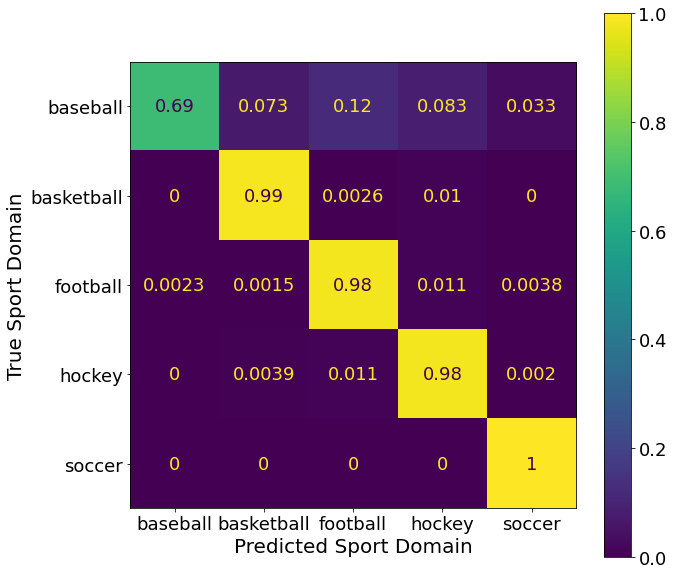

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(list(zip(*sato_predictions))[0], list(zip(*sato_predictions))[1], labels=['baseball', 'basketball', 'football', 'hockey', 'soccer'], normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['baseball', 'basketball', 'football', 'hockey', 'soccer'])
disp.plot(ax=ax, cmap="viridis")
plt.rcParams.update({'font.size': 18})
plt.xlabel('Predicted Sport Domain', fontsize=20)
plt.ylabel('True Sport Domain', fontsize=20)
plt.savefig(f"./sato_conf_matrix.png", bbox_inches="tight", dpi=600, transparent=True)
plt.show()

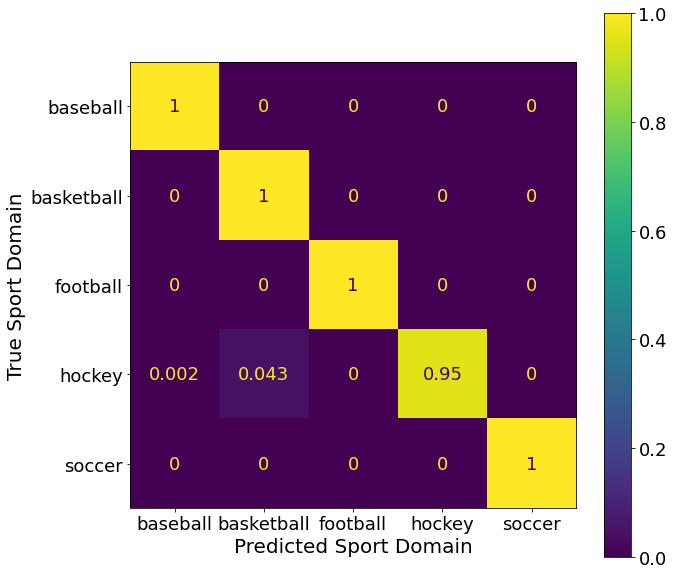

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(list(zip(*doduo_predictions))[0], list(zip(*doduo_predictions))[1], labels=['baseball', 'basketball', 'football', 'hockey', 'soccer'], normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['baseball', 'basketball', 'football', 'hockey', 'soccer'])
disp.plot(ax=ax, cmap="viridis")
plt.rcParams.update({'font.size': 18})
plt.xlabel('Predicted Sport Domain', fontsize=20)
plt.ylabel('True Sport Domain', fontsize=20)
plt.savefig(f"./doduo_conf_matrix.png", bbox_inches="tight", dpi=600, transparent=True)
plt.show()

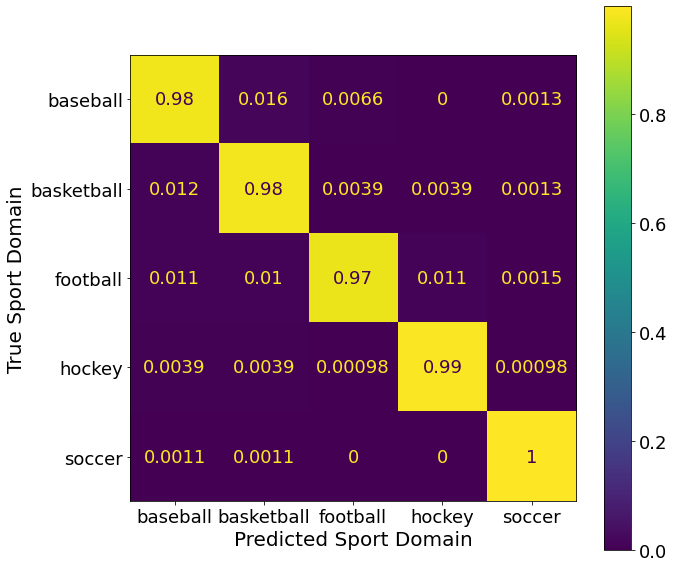

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,10))
cm = confusion_matrix(list(zip(*gcn_predictions))[0], list(zip(*gcn_predictions))[1], labels=['baseball', 'basketball', 'football', 'hockey', 'soccer'], normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['baseball', 'basketball', 'football', 'hockey', 'soccer'])
disp.plot(ax=ax, cmap="viridis")
plt.rcParams.update({'font.size': 18})
plt.xlabel('Predicted Sport Domain', fontsize=20)
plt.ylabel('True Sport Domain', fontsize=20)
plt.savefig(f"./pythagoras_conf_matrix.png", bbox_inches="tight", dpi=600, transparent=True)
plt.show()